In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft
from scipy.signal import savgol_filter
%matplotlib notebook

/home/blimen/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read data from CSV file
#filename = 'Whirlpool/data_Whirlpool_MQTT_2024-05-06_serviettes_2.csv'
filename = 'Beko/data_Beko_MQTT_2024-05-04_serviettes_2.csv'
df = pd.read_csv(f"Data Processing/{filename}")

# Split data from both sensors respectively
adxl_data = df[df['sensor_name'] == 'ADXL345']
mpu_data = df[df['sensor_name'] == 'MPU6050_A']

<IPython.core.display.Javascript object>


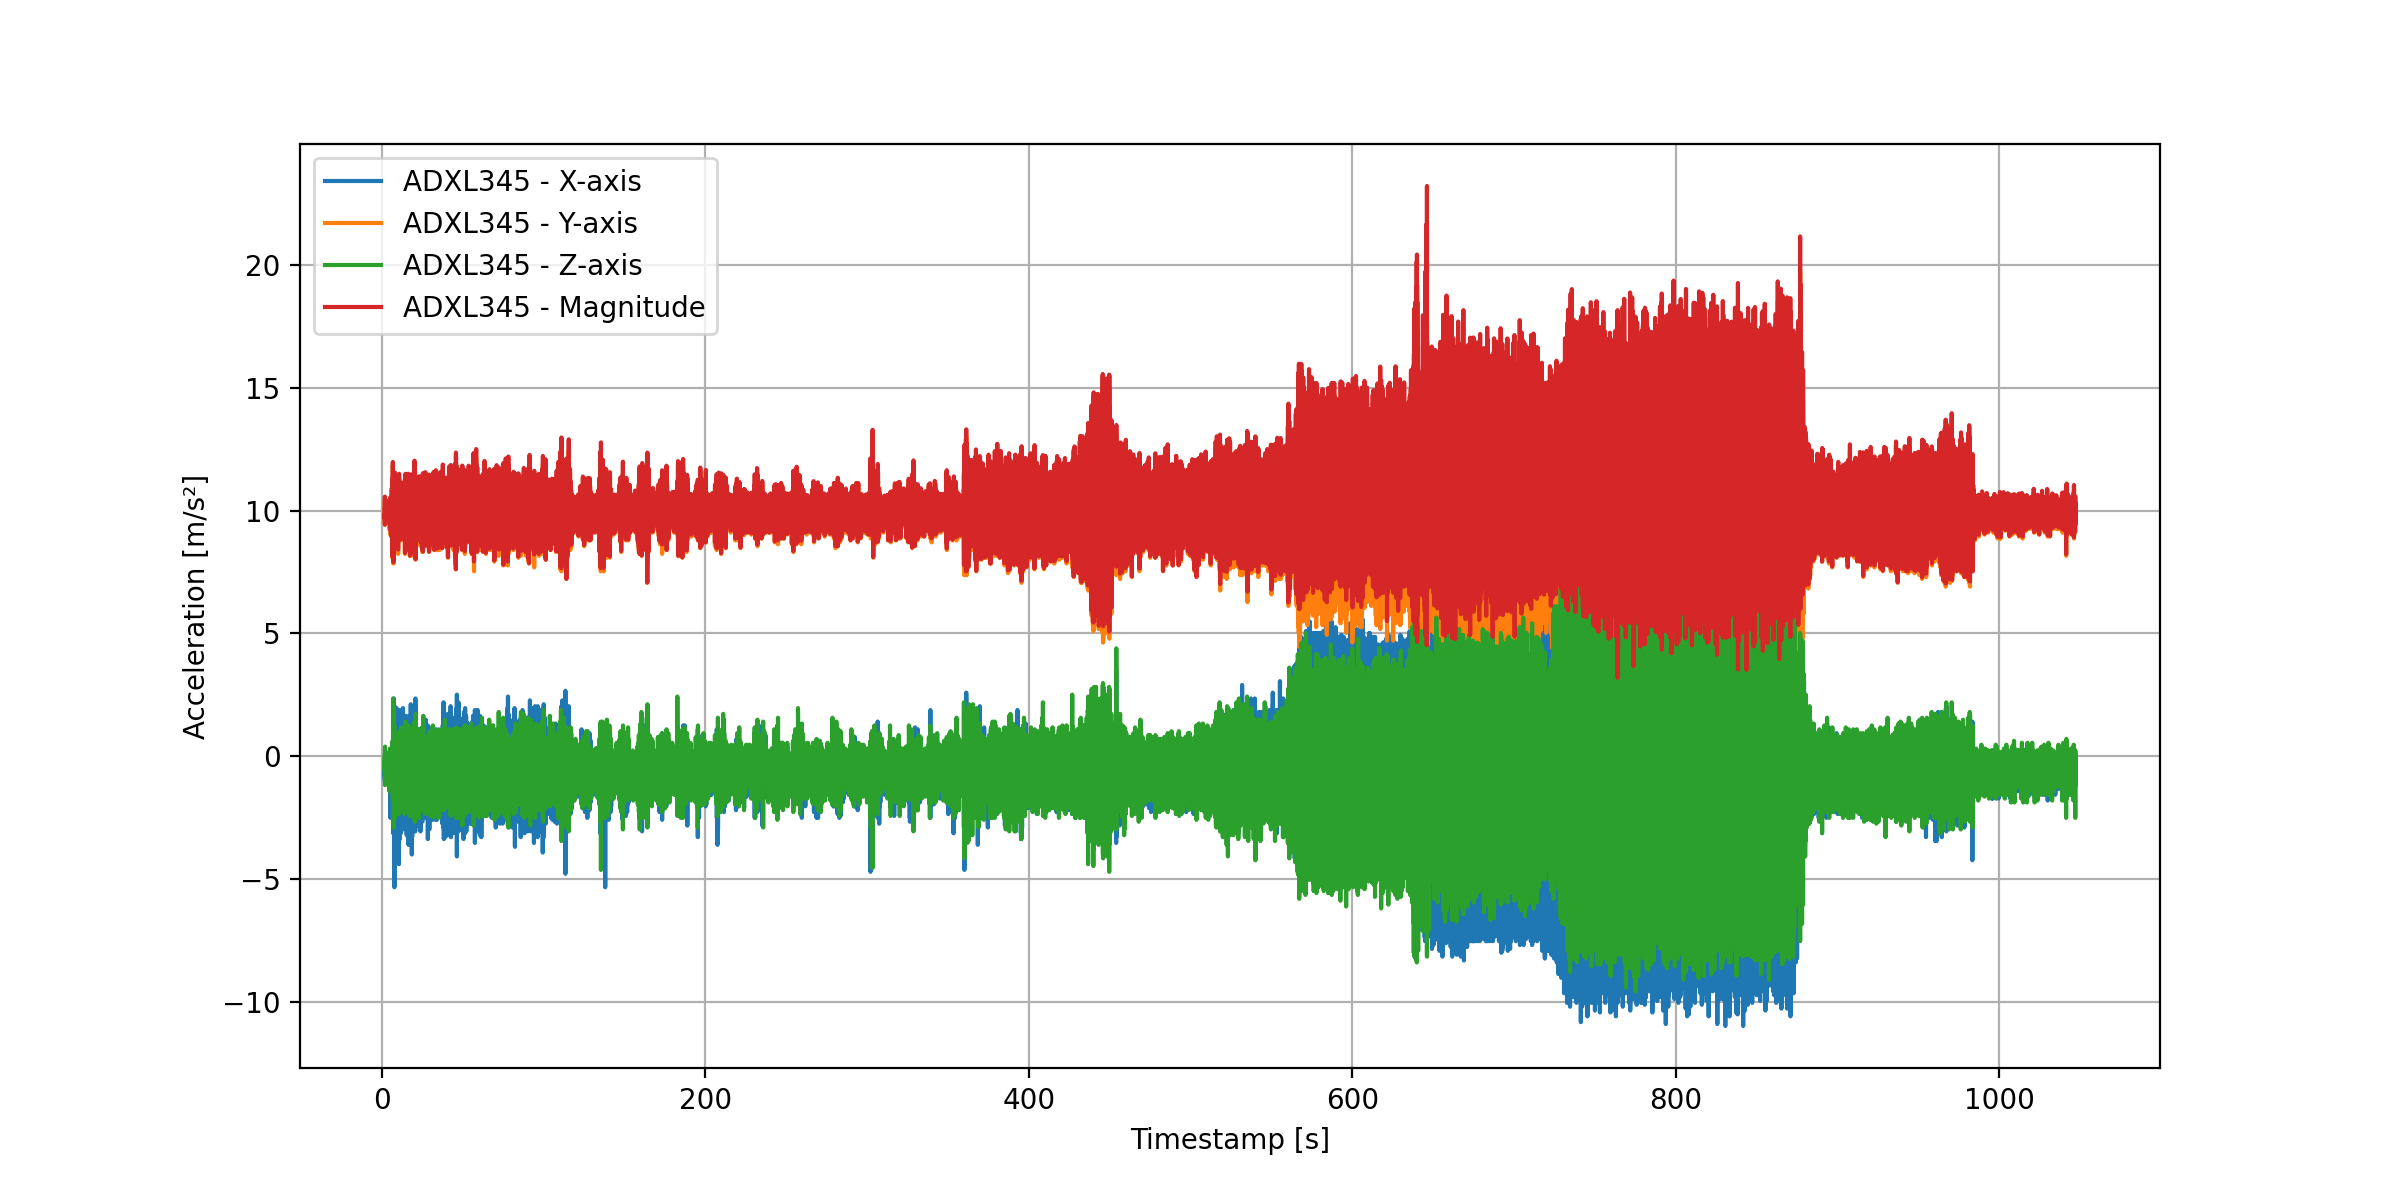

In [3]:
# Time Series Analysis

# Plot time series data for ADXL345
plt.figure(figsize=(12, 6))
plt.plot(adxl_data['timestamp'].values/1000, adxl_data['acceleration_x'].values, label='ADXL345 - X-axis')
plt.plot(adxl_data['timestamp'].values/1000, adxl_data['acceleration_y'].values, label='ADXL345 - Y-axis')
plt.plot(adxl_data['timestamp'].values/1000, adxl_data['acceleration_z'].values, label='ADXL345 - Z-axis')
plt.plot(adxl_data['timestamp'].values/1000, adxl_data['acceleration_magnitude'].values, label='ADXL345 - Magnitude')
plt.xlabel('Timestamp [s]')
plt.ylabel('Acceleration [m/s²]')
plt.legend()
plt.grid(True)
plt.show()
#plt.savefig(f"adxl_{filename}.jpg")

<IPython.core.display.Javascript object>


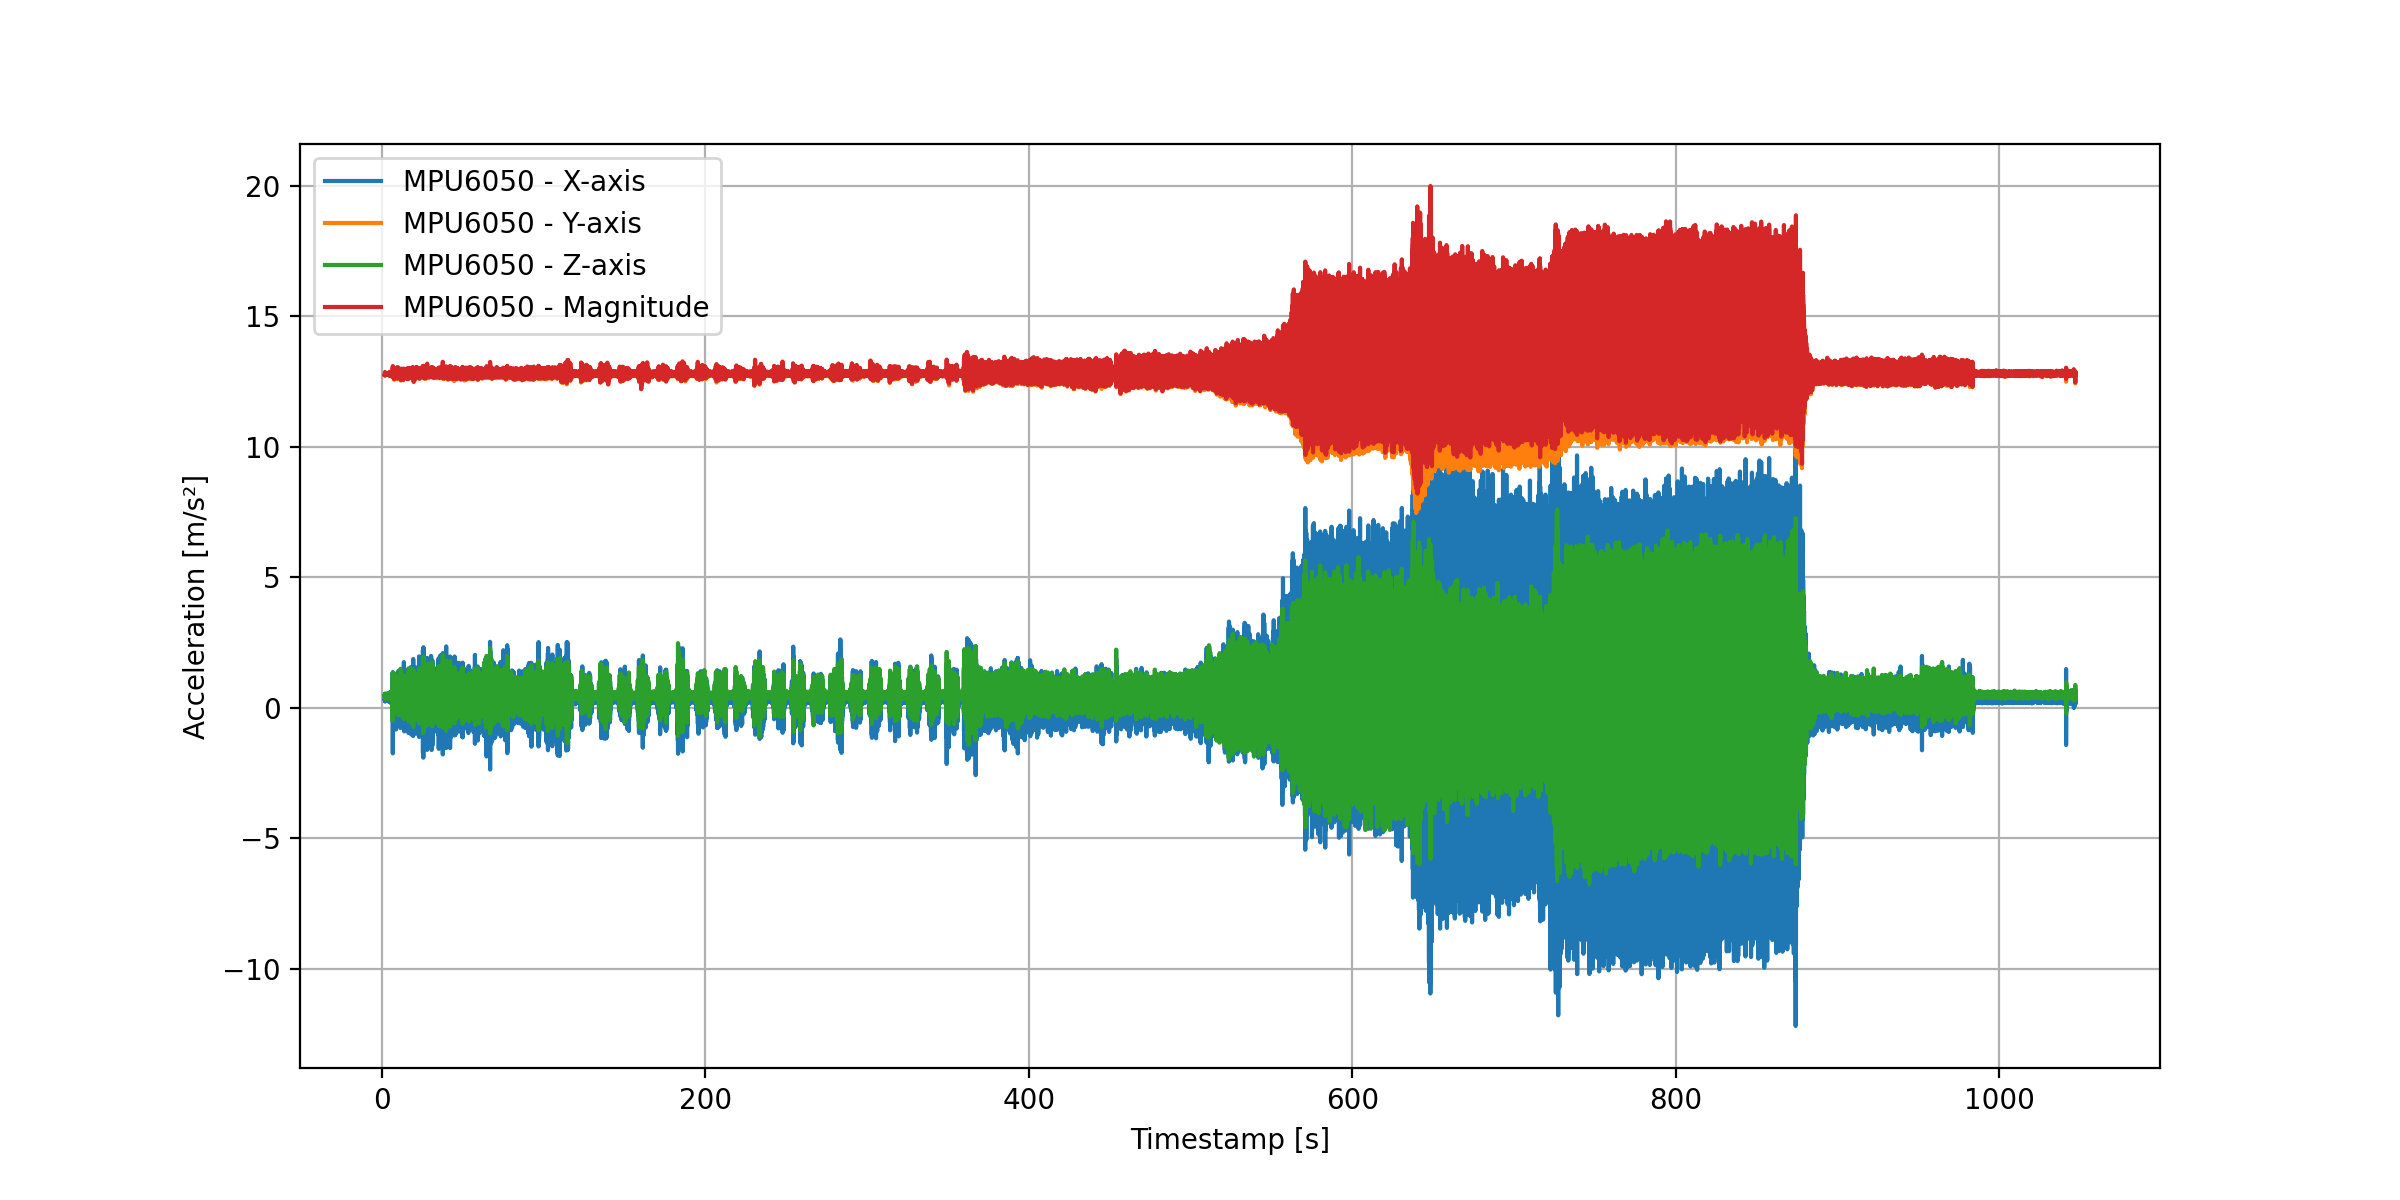

In [7]:
# Plot time series data for MPU6050
plt.figure(figsize=(12, 6))
plt.plot(mpu_data['timestamp'].values/1000, mpu_data['acceleration_x'].values, label='MPU6050 - X-axis')
plt.plot(mpu_data['timestamp'].values/1000, mpu_data['acceleration_y'].values, label='MPU6050 - Y-axis')
plt.plot(mpu_data['timestamp'].values/1000, mpu_data['acceleration_z'].values, label='MPU6050 - Z-axis')
plt.plot(mpu_data['timestamp'].values/1000, mpu_data['acceleration_magnitude'].values, label='MPU6050 - Magnitude')
plt.xlabel('Timestamp [s]')
plt.ylabel('Acceleration [m/s²]')
plt.legend()
plt.grid(True)
plt.show()
#plt.savefig(f"mpu_{filename}.jpg")

<IPython.core.display.Javascript object>


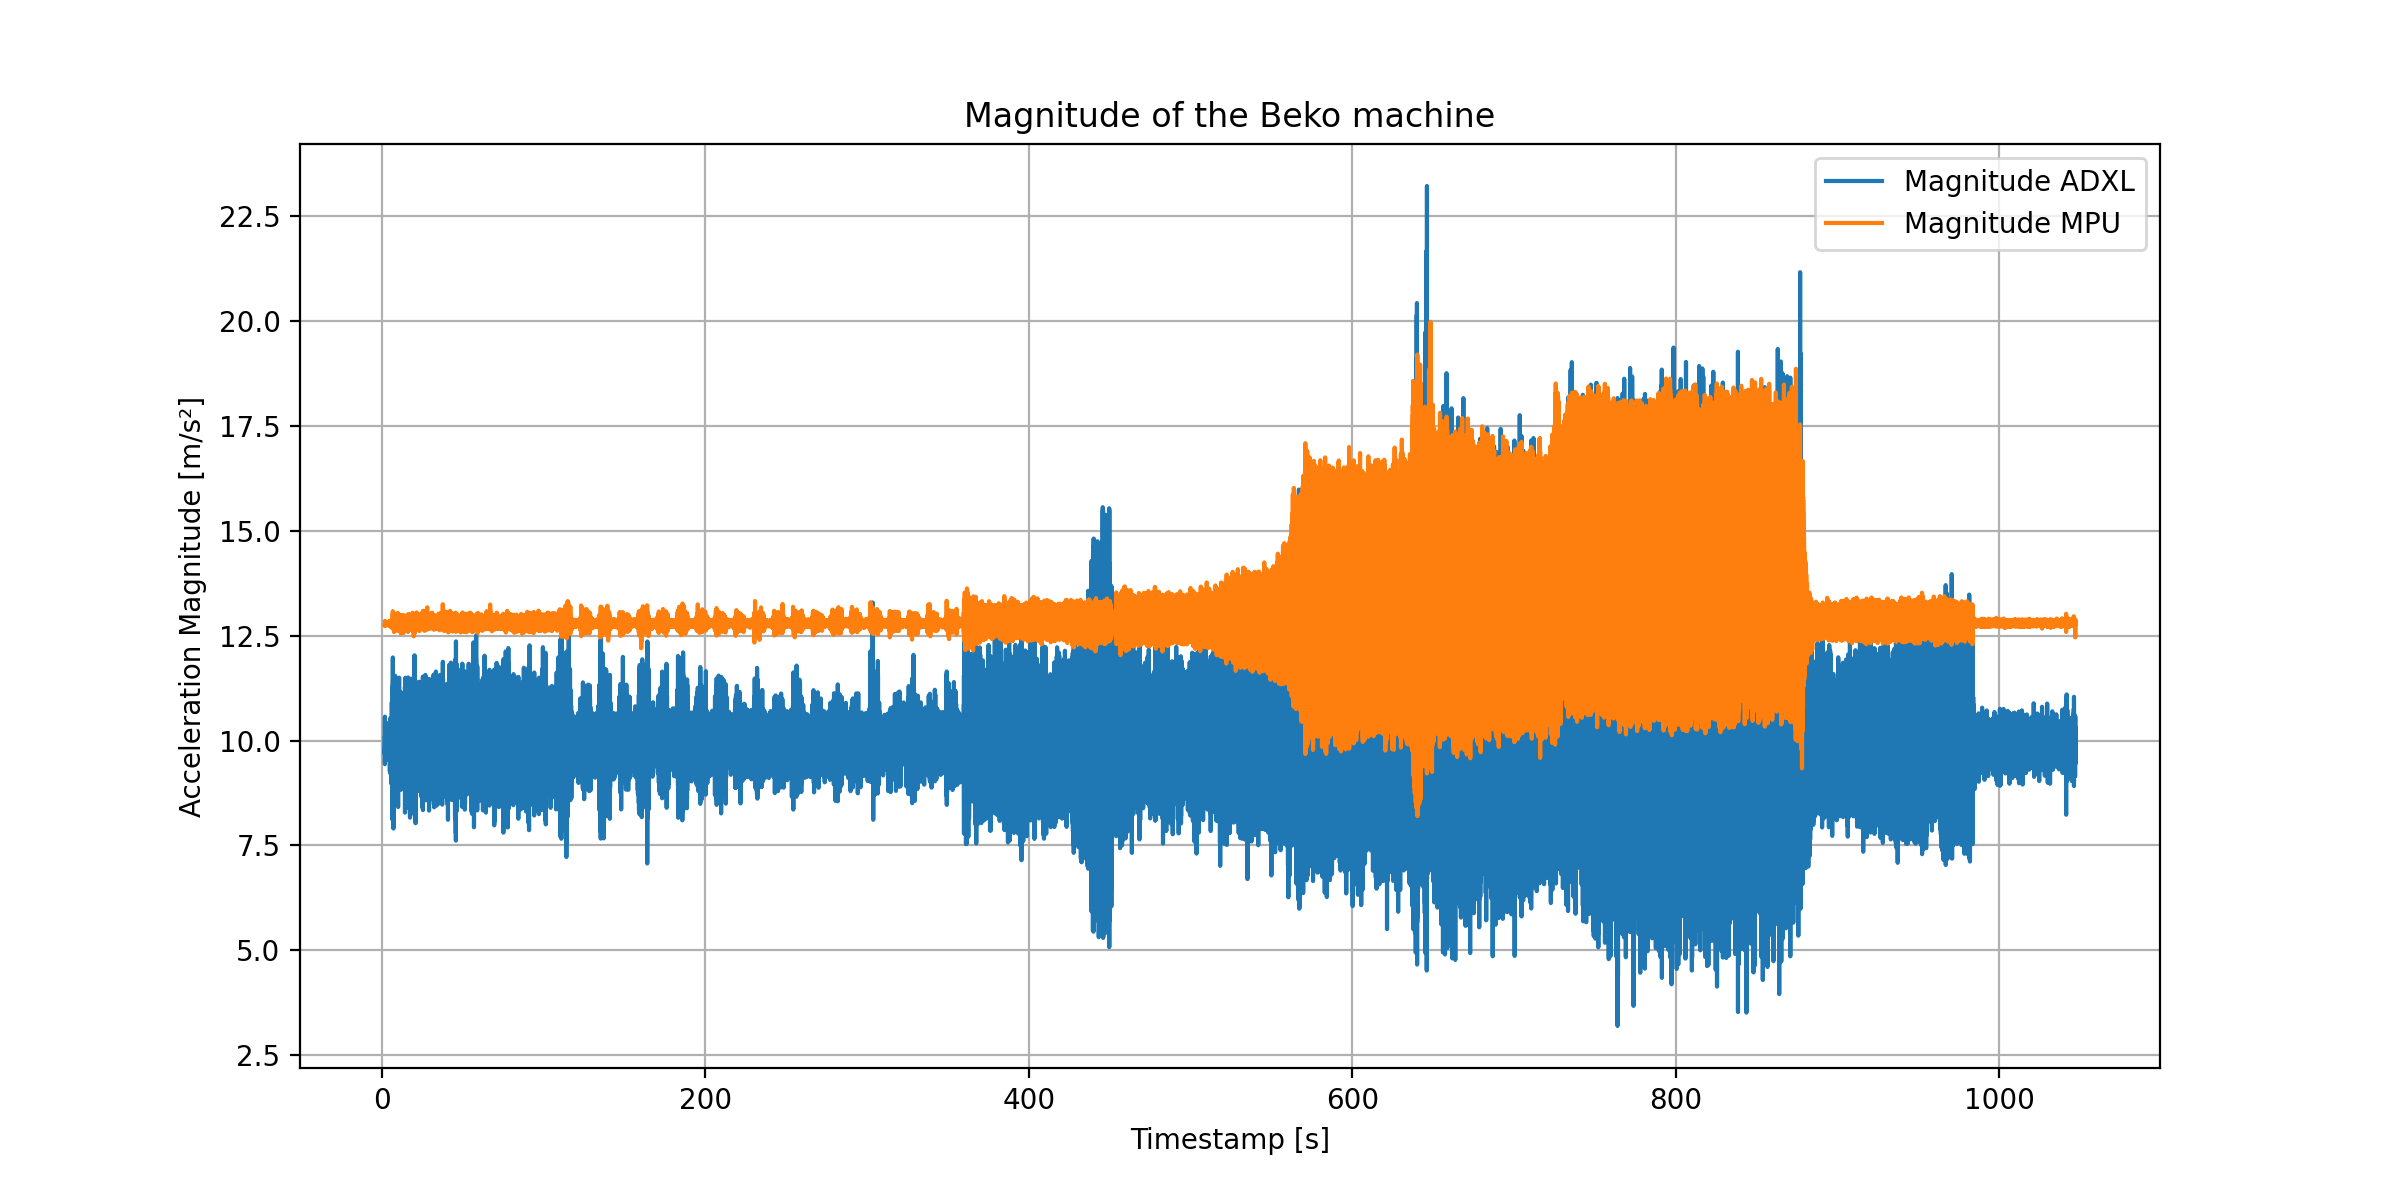

In [8]:
# Time Series Analysis : Total magnitude comparison

plt.figure(figsize=(12, 6))
plt.plot(adxl_data['timestamp'].values/1000, adxl_data['acceleration_magnitude'].values, label='Magnitude ADXL')
plt.plot(mpu_data['timestamp'].values/1000, mpu_data['acceleration_magnitude'].values, label='Magnitude MPU')
plt.xlabel('Timestamp [s]')
plt.ylabel('Acceleration Magnitude [m/s²]')
plt.title('Magnitude of the Beko machine')
plt.legend()
plt.grid(True)
plt.show()
#plt.savefig(f"magnitude_Beko_MQTT_2024-05-04_serviettes_2.jpg")

<IPython.core.display.Javascript object>


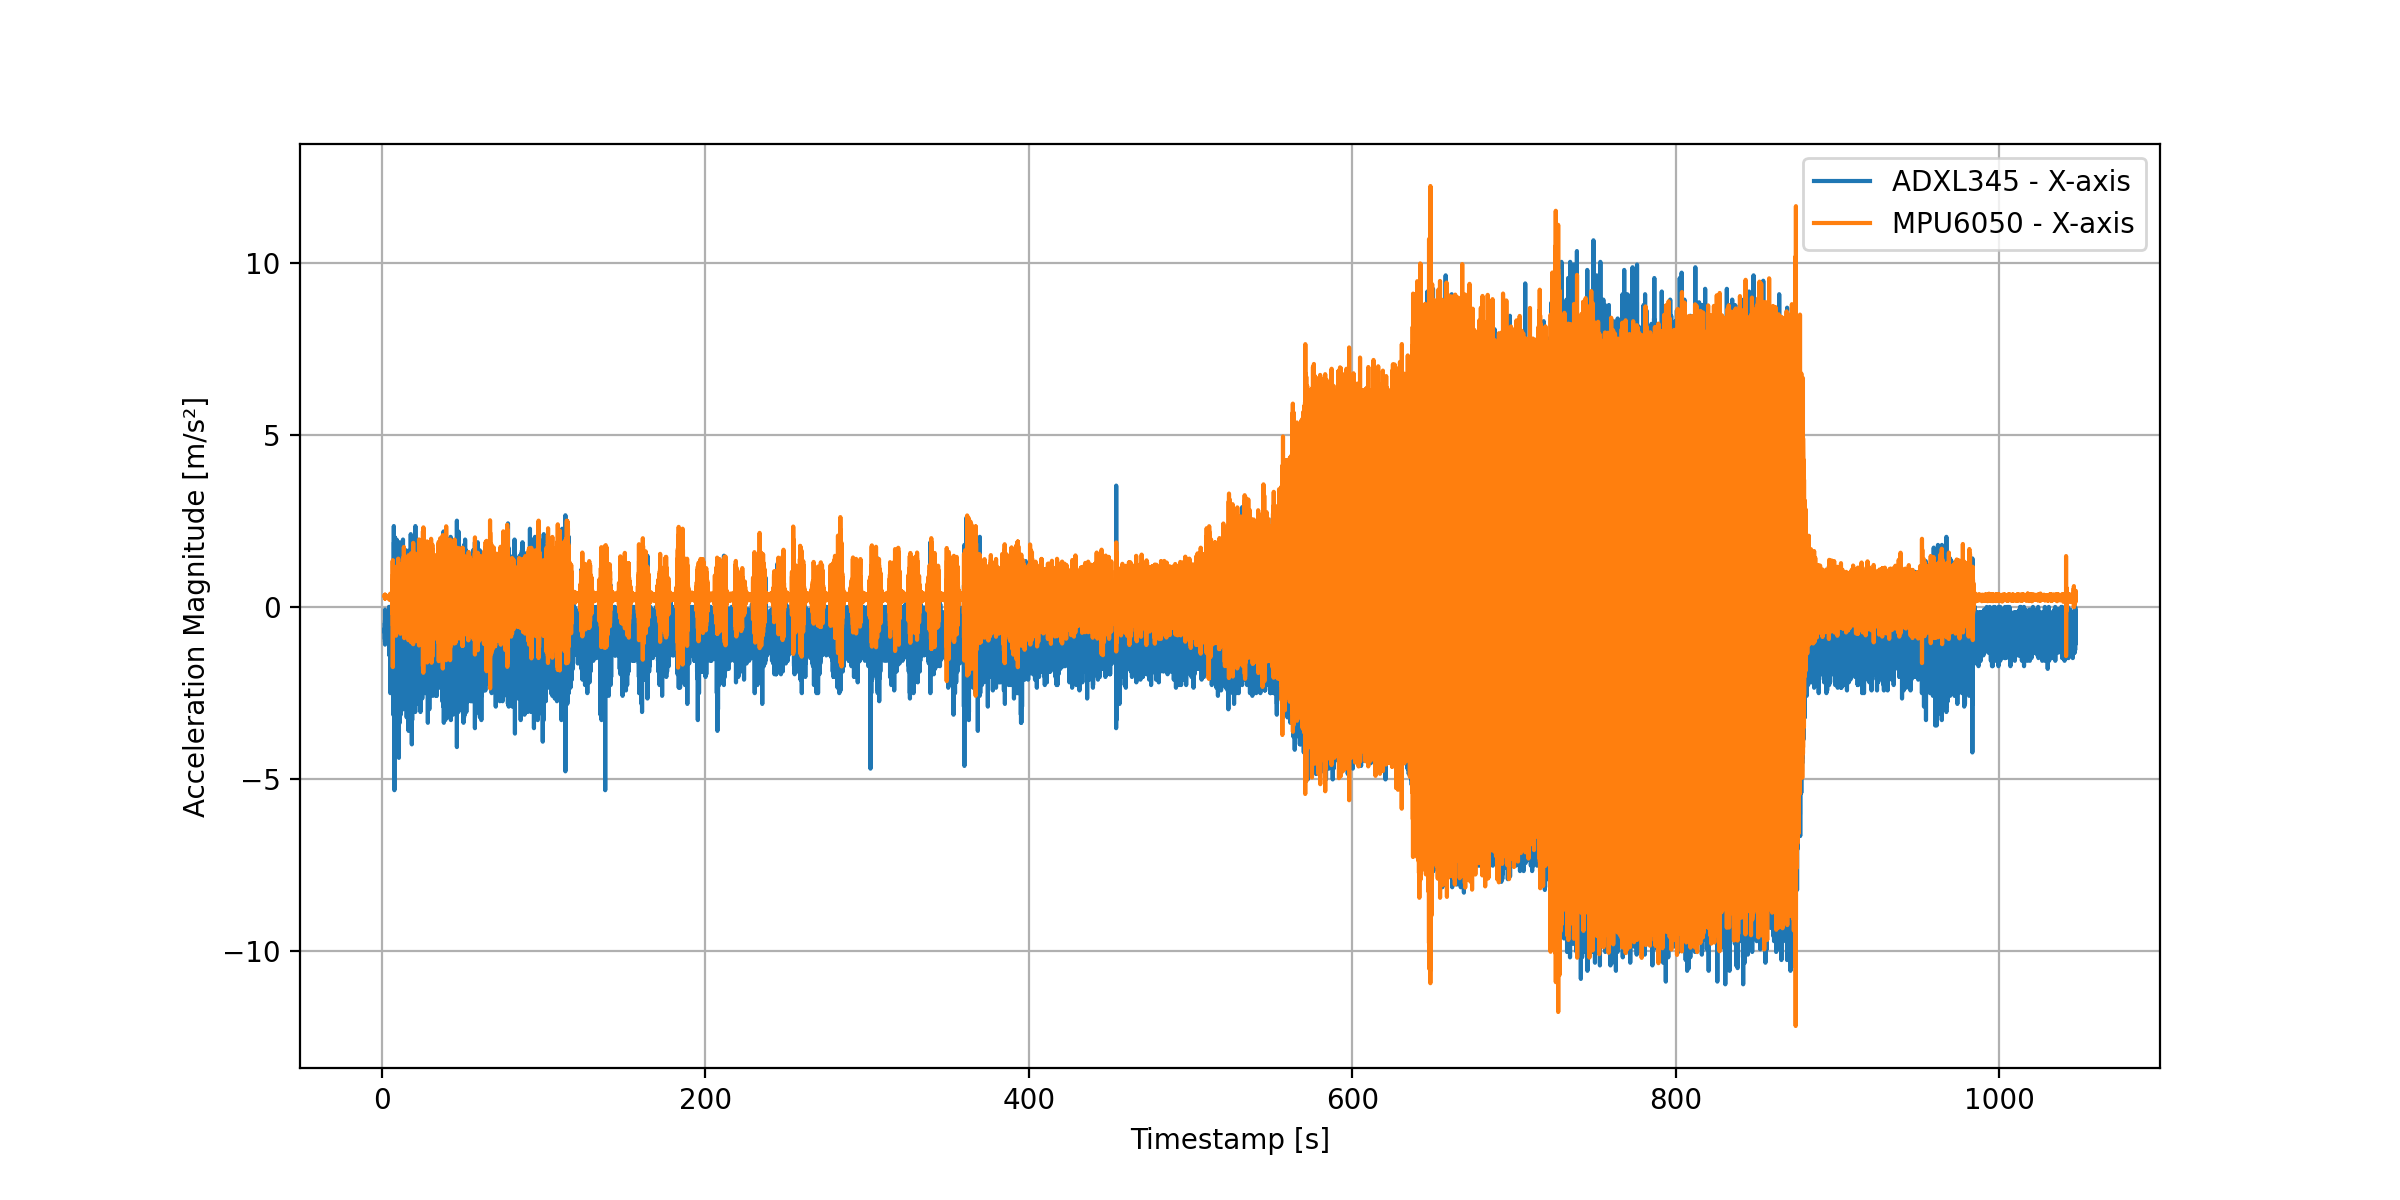

In [9]:
# Time Series Analysis : X-axis comparison

plt.figure(figsize=(12, 6))
plt.plot(adxl_data['timestamp'].values/1000, adxl_data['acceleration_x'].values, label='ADXL345 - X-axis')
plt.plot(mpu_data['timestamp'].values/1000, mpu_data['acceleration_x'].values, label='MPU6050 - X-axis')
plt.xlabel('Timestamp [s]')
plt.ylabel('Acceleration Magnitude [m/s²]')
plt.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


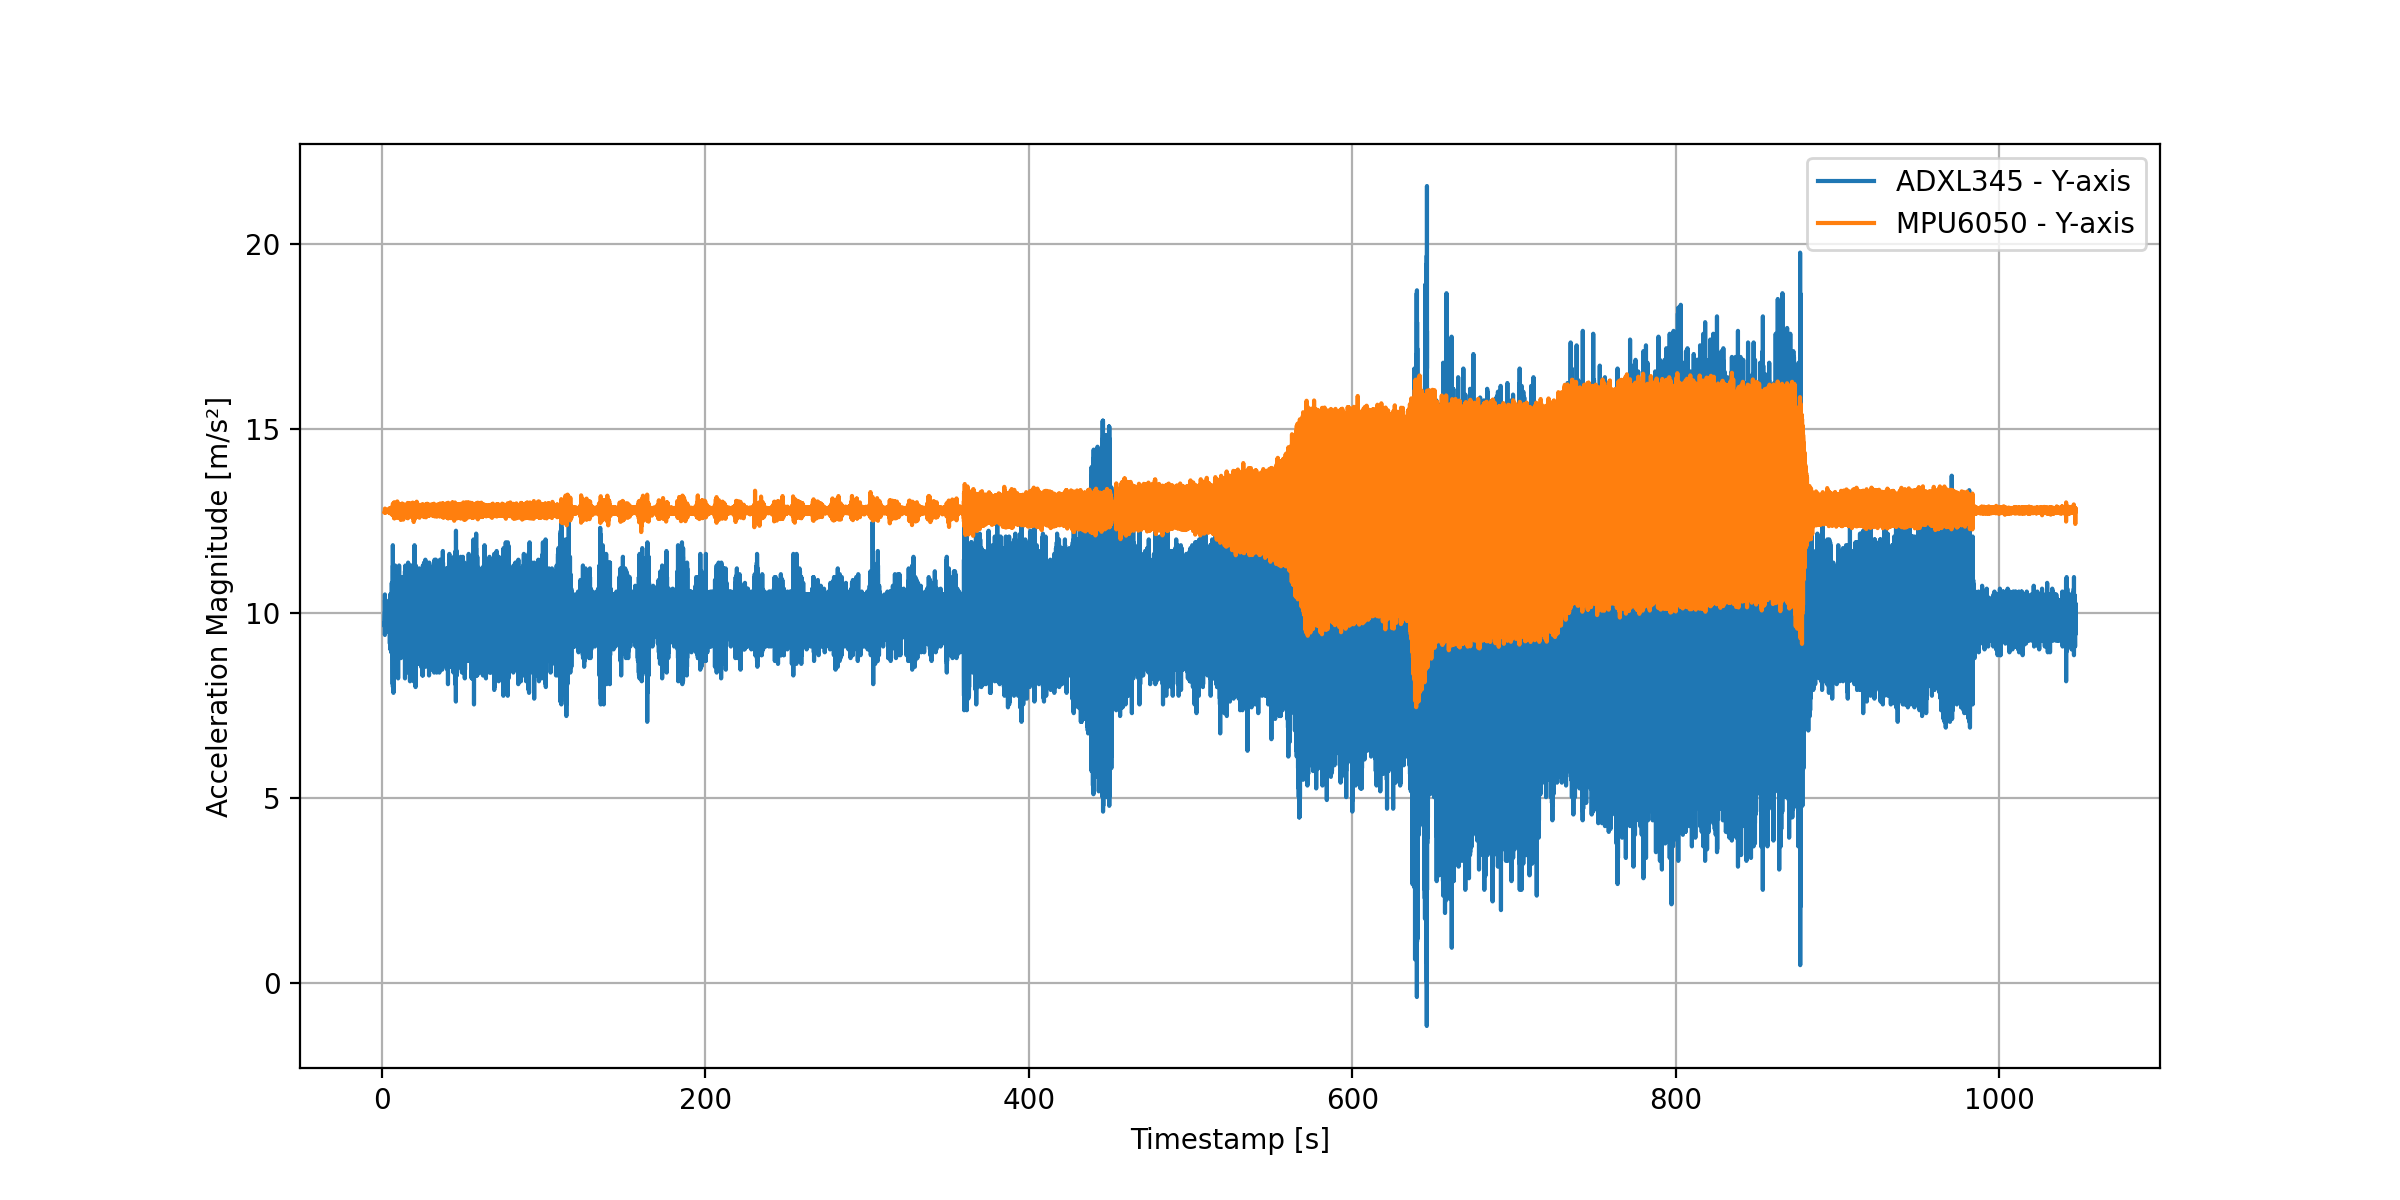

In [10]:
# Time Series Analysis : Y-axis comparison

plt.figure(figsize=(12, 6))
plt.plot(adxl_data['timestamp'].values/1000, adxl_data['acceleration_y'].values, label='ADXL345 - Y-axis')
plt.plot(mpu_data['timestamp'].values/1000, mpu_data['acceleration_y'].values, label='MPU6050 - Y-axis')
plt.xlabel('Timestamp [s]')
plt.ylabel('Acceleration Magnitude [m/s²]')
plt.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


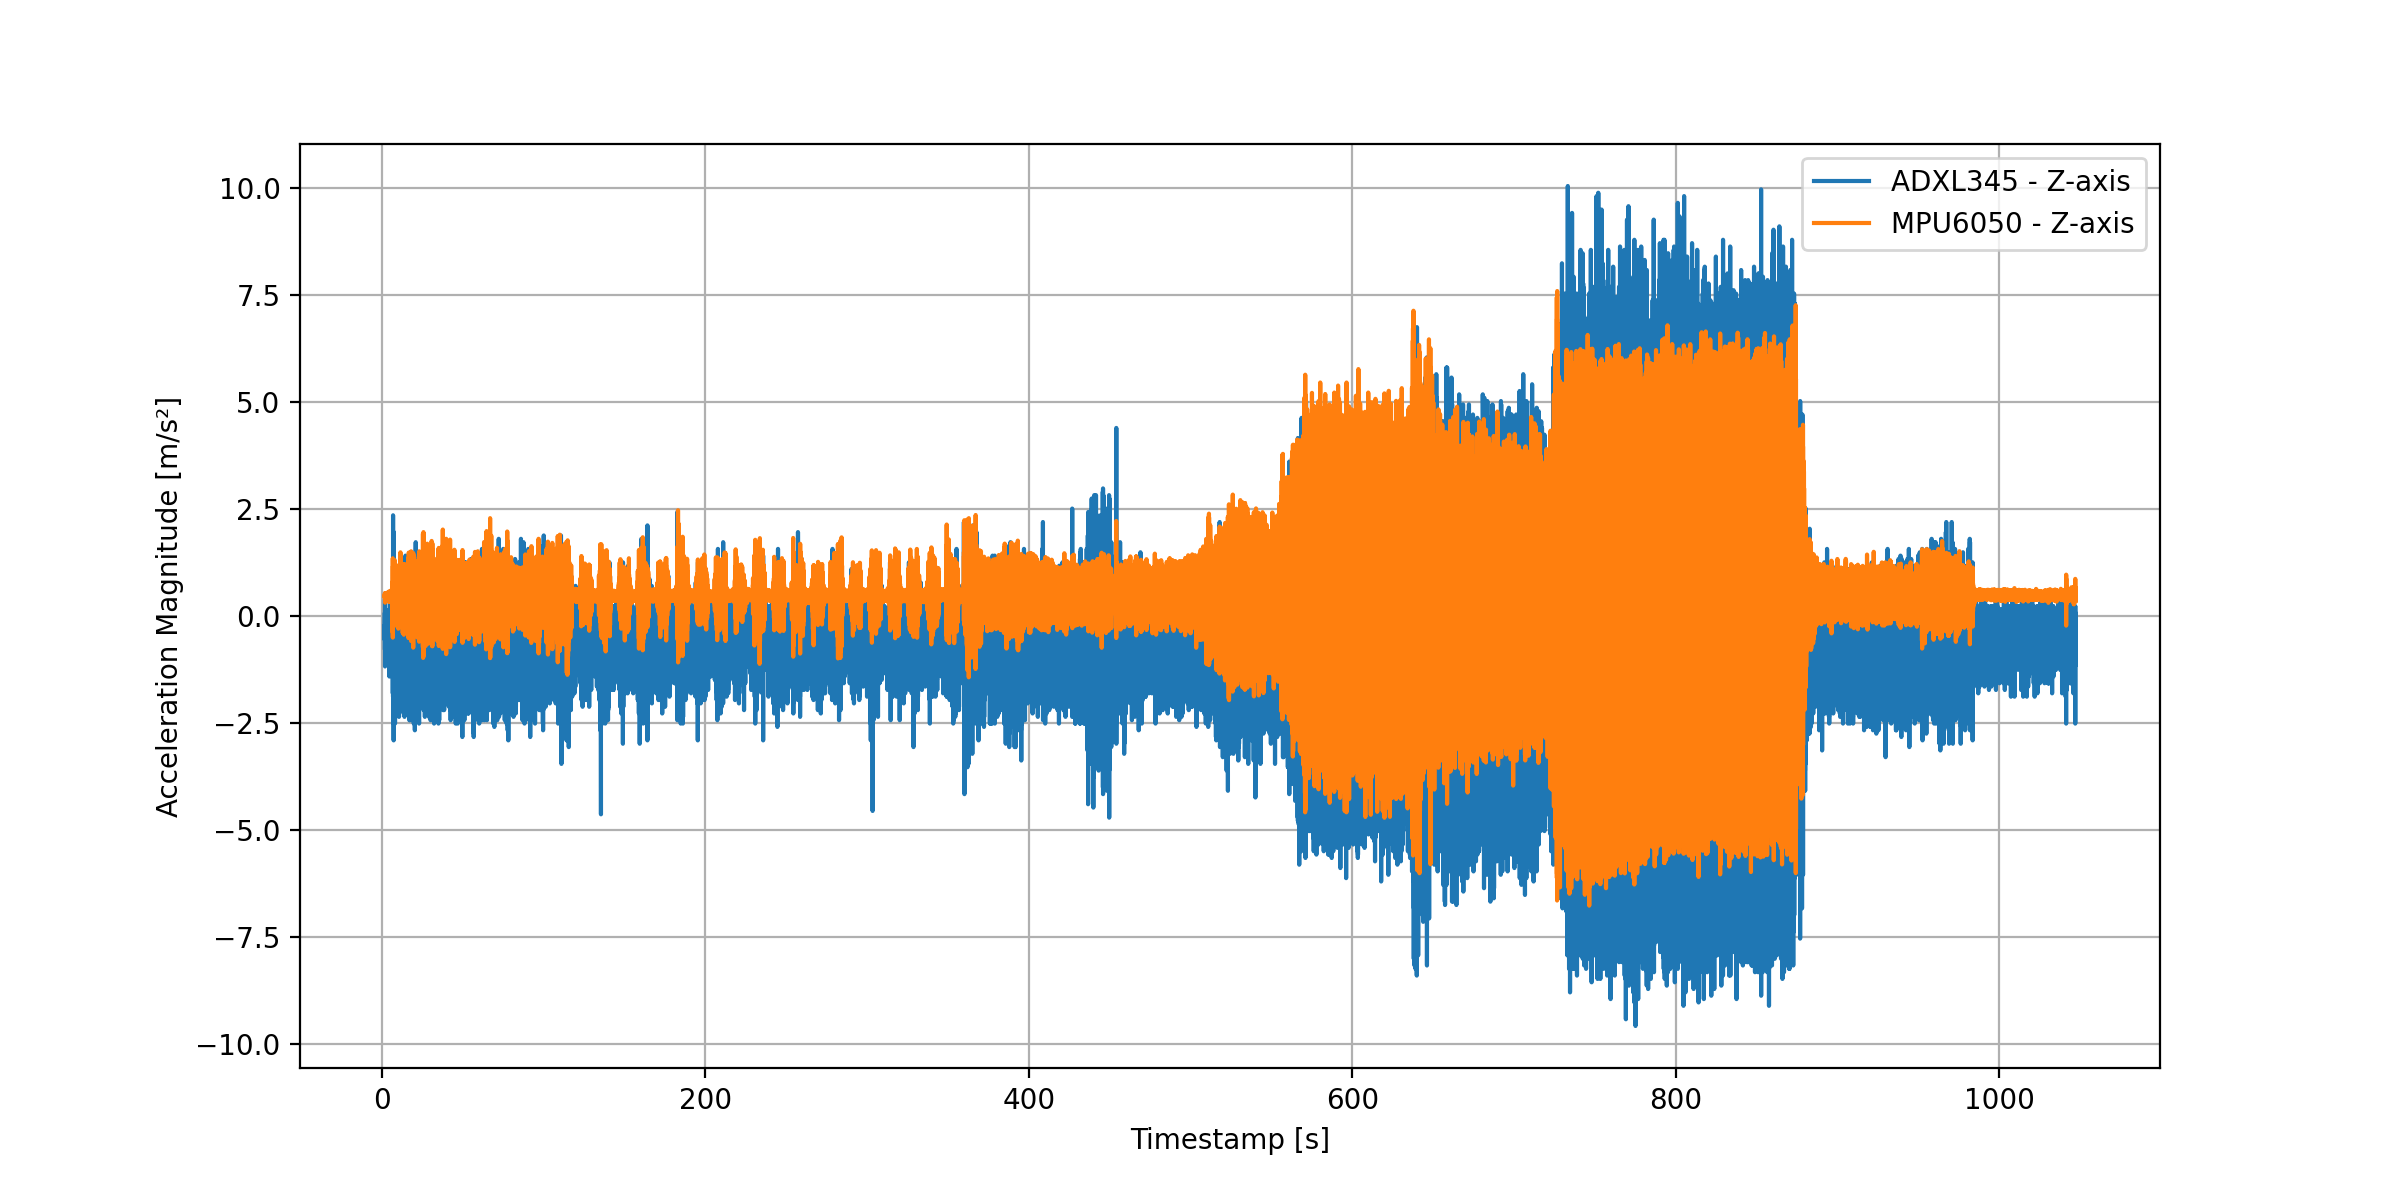

In [11]:
# Time Series Analysis : Z-axis comparison

plt.figure(figsize=(12, 6))
plt.plot(adxl_data['timestamp'].values/1000, adxl_data['acceleration_z'].values, label='ADXL345 - Z-axis')
plt.plot(mpu_data['timestamp'].values/1000, mpu_data['acceleration_z'].values, label='MPU6050 - Z-axis')
plt.xlabel('Timestamp [s]')
plt.ylabel('Acceleration Magnitude [m/s²]')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Frequency Domain Analysis

## ADXL345 ##

# Compute fft
fs = 1 / np.mean(np.diff(adxl_data['timestamp']/1000))
n = len(adxl_data['acceleration_x'])

frequencies = np.fft.fftfreq(n, d=1/fs)
fft_values_x = np.fft.fft(adxl_data['acceleration_x'])
fft_values_y = np.fft.fft(adxl_data['acceleration_y'])
fft_values_z = np.fft.fft(adxl_data['acceleration_z'])
fft_values_mag = np.fft.fft(adxl_data['acceleration_magnitude'])

## MPU5060 ##

# Compute fft
fs2 = 1 / np.mean(np.diff(mpu_data['timestamp']/1000))
n2 = len(mpu_data['acceleration_x'])
frequencies2 = np.fft.fftfreq(n2, d=1/fs2)

fft_values2_x = np.fft.fft(mpu_data['acceleration_x'])
fft_values2_y = np.fft.fft(mpu_data['acceleration_y'])
fft_values2_z = np.fft.fft(mpu_data['acceleration_z'])
fft_values2_mag = np.fft.fft(mpu_data['acceleration_magnitude'])

## WOI ##

# Define window of interest (e.g., from 3 to 7 Hz)
f_start = -50
f_end = 50 
ampl_start = 0
ampl_end = 15000



<IPython.core.display.Javascript object>


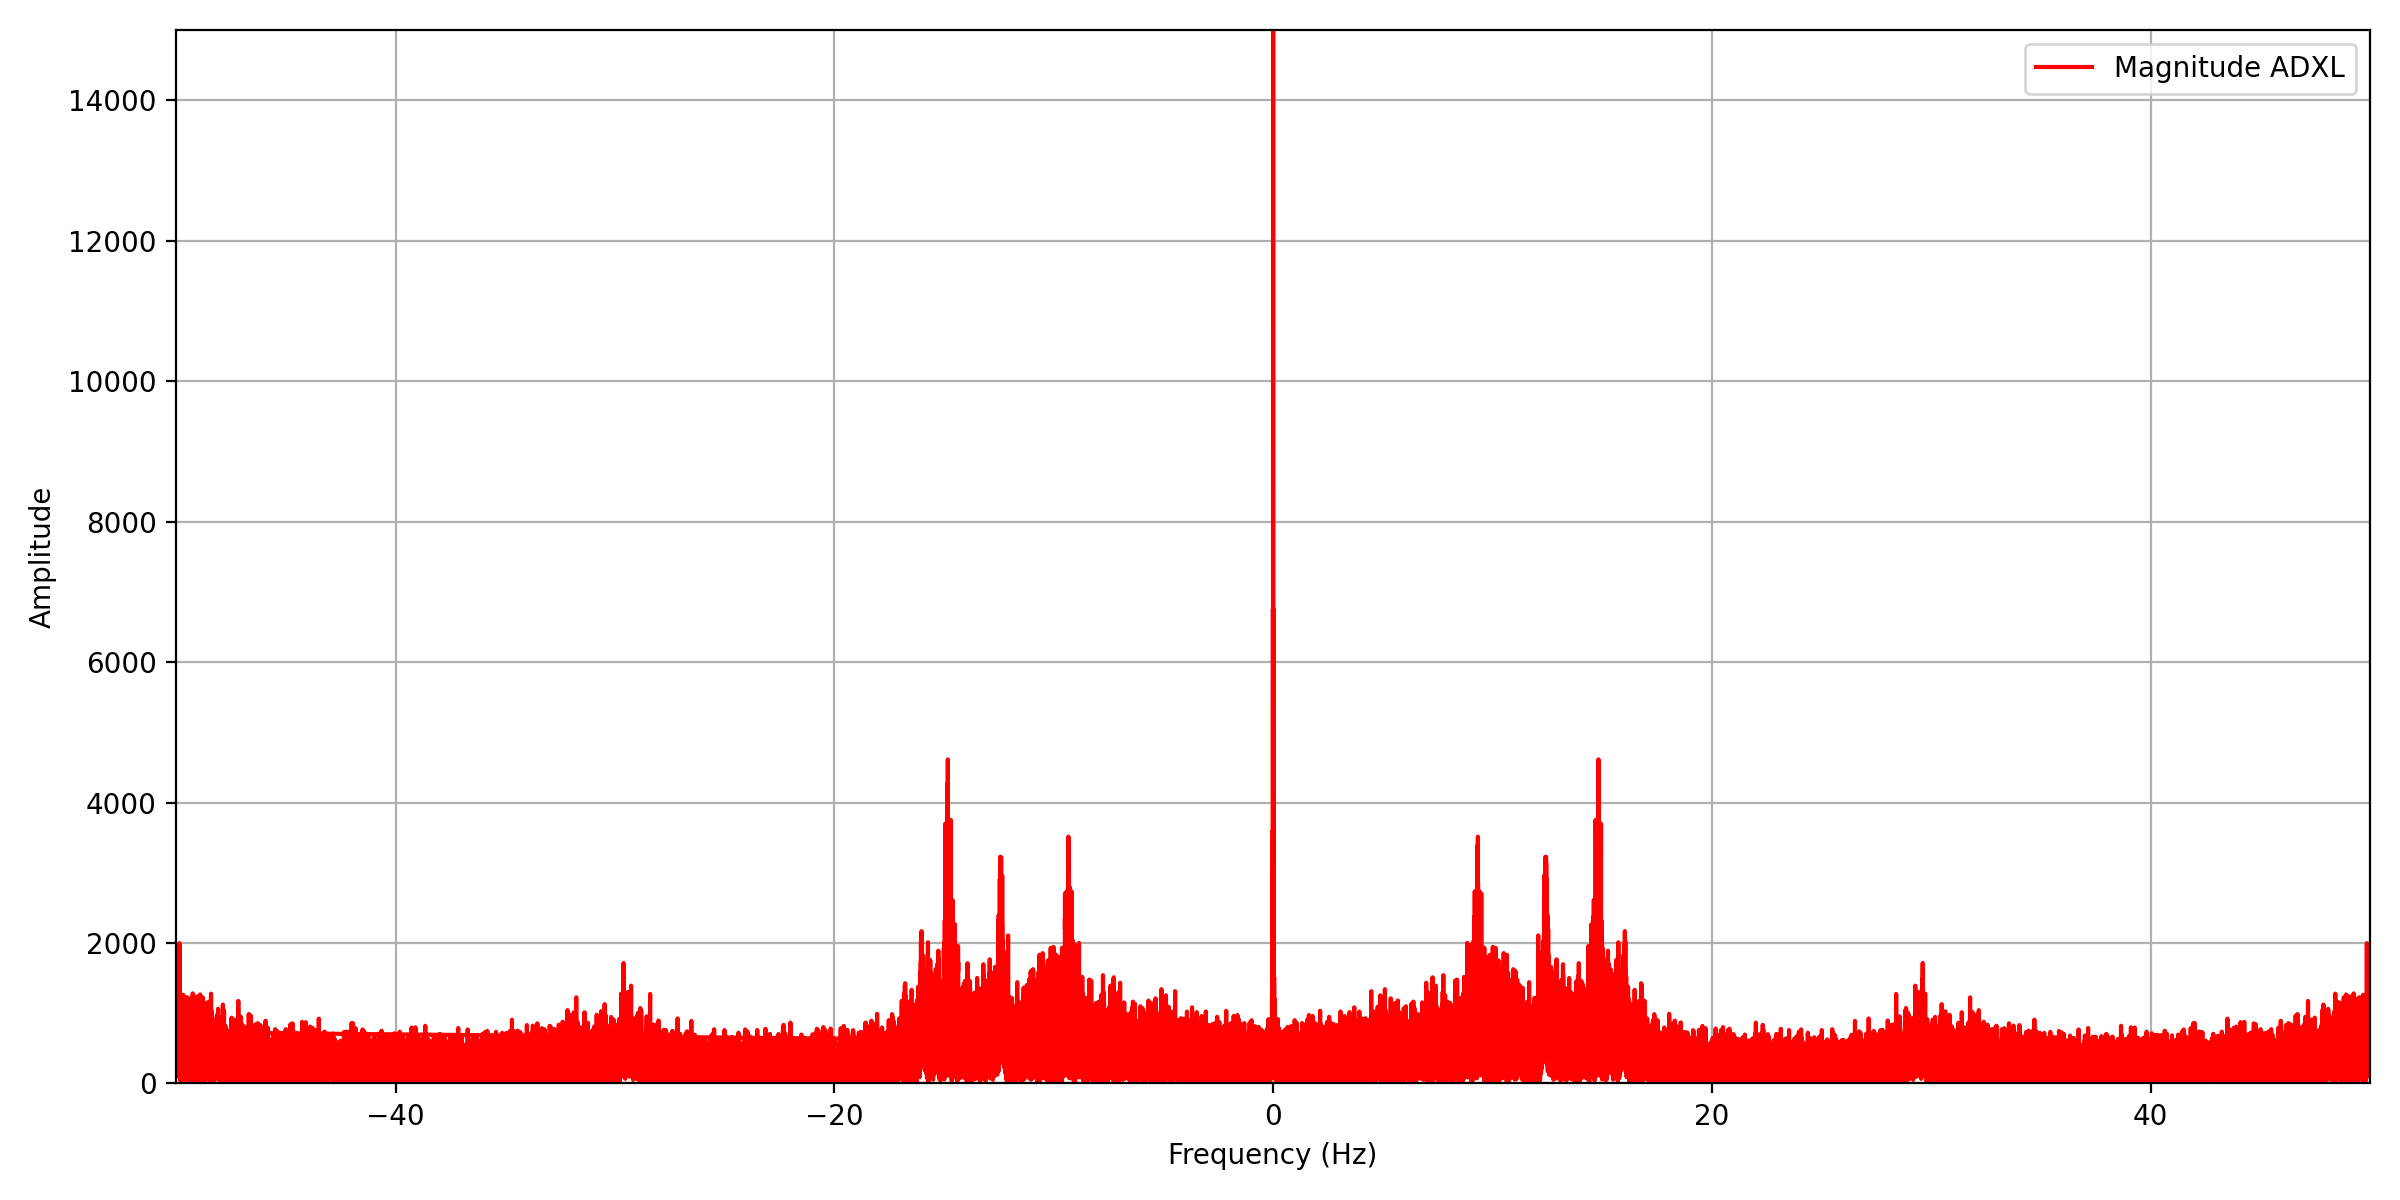

<IPython.core.display.Javascript object>


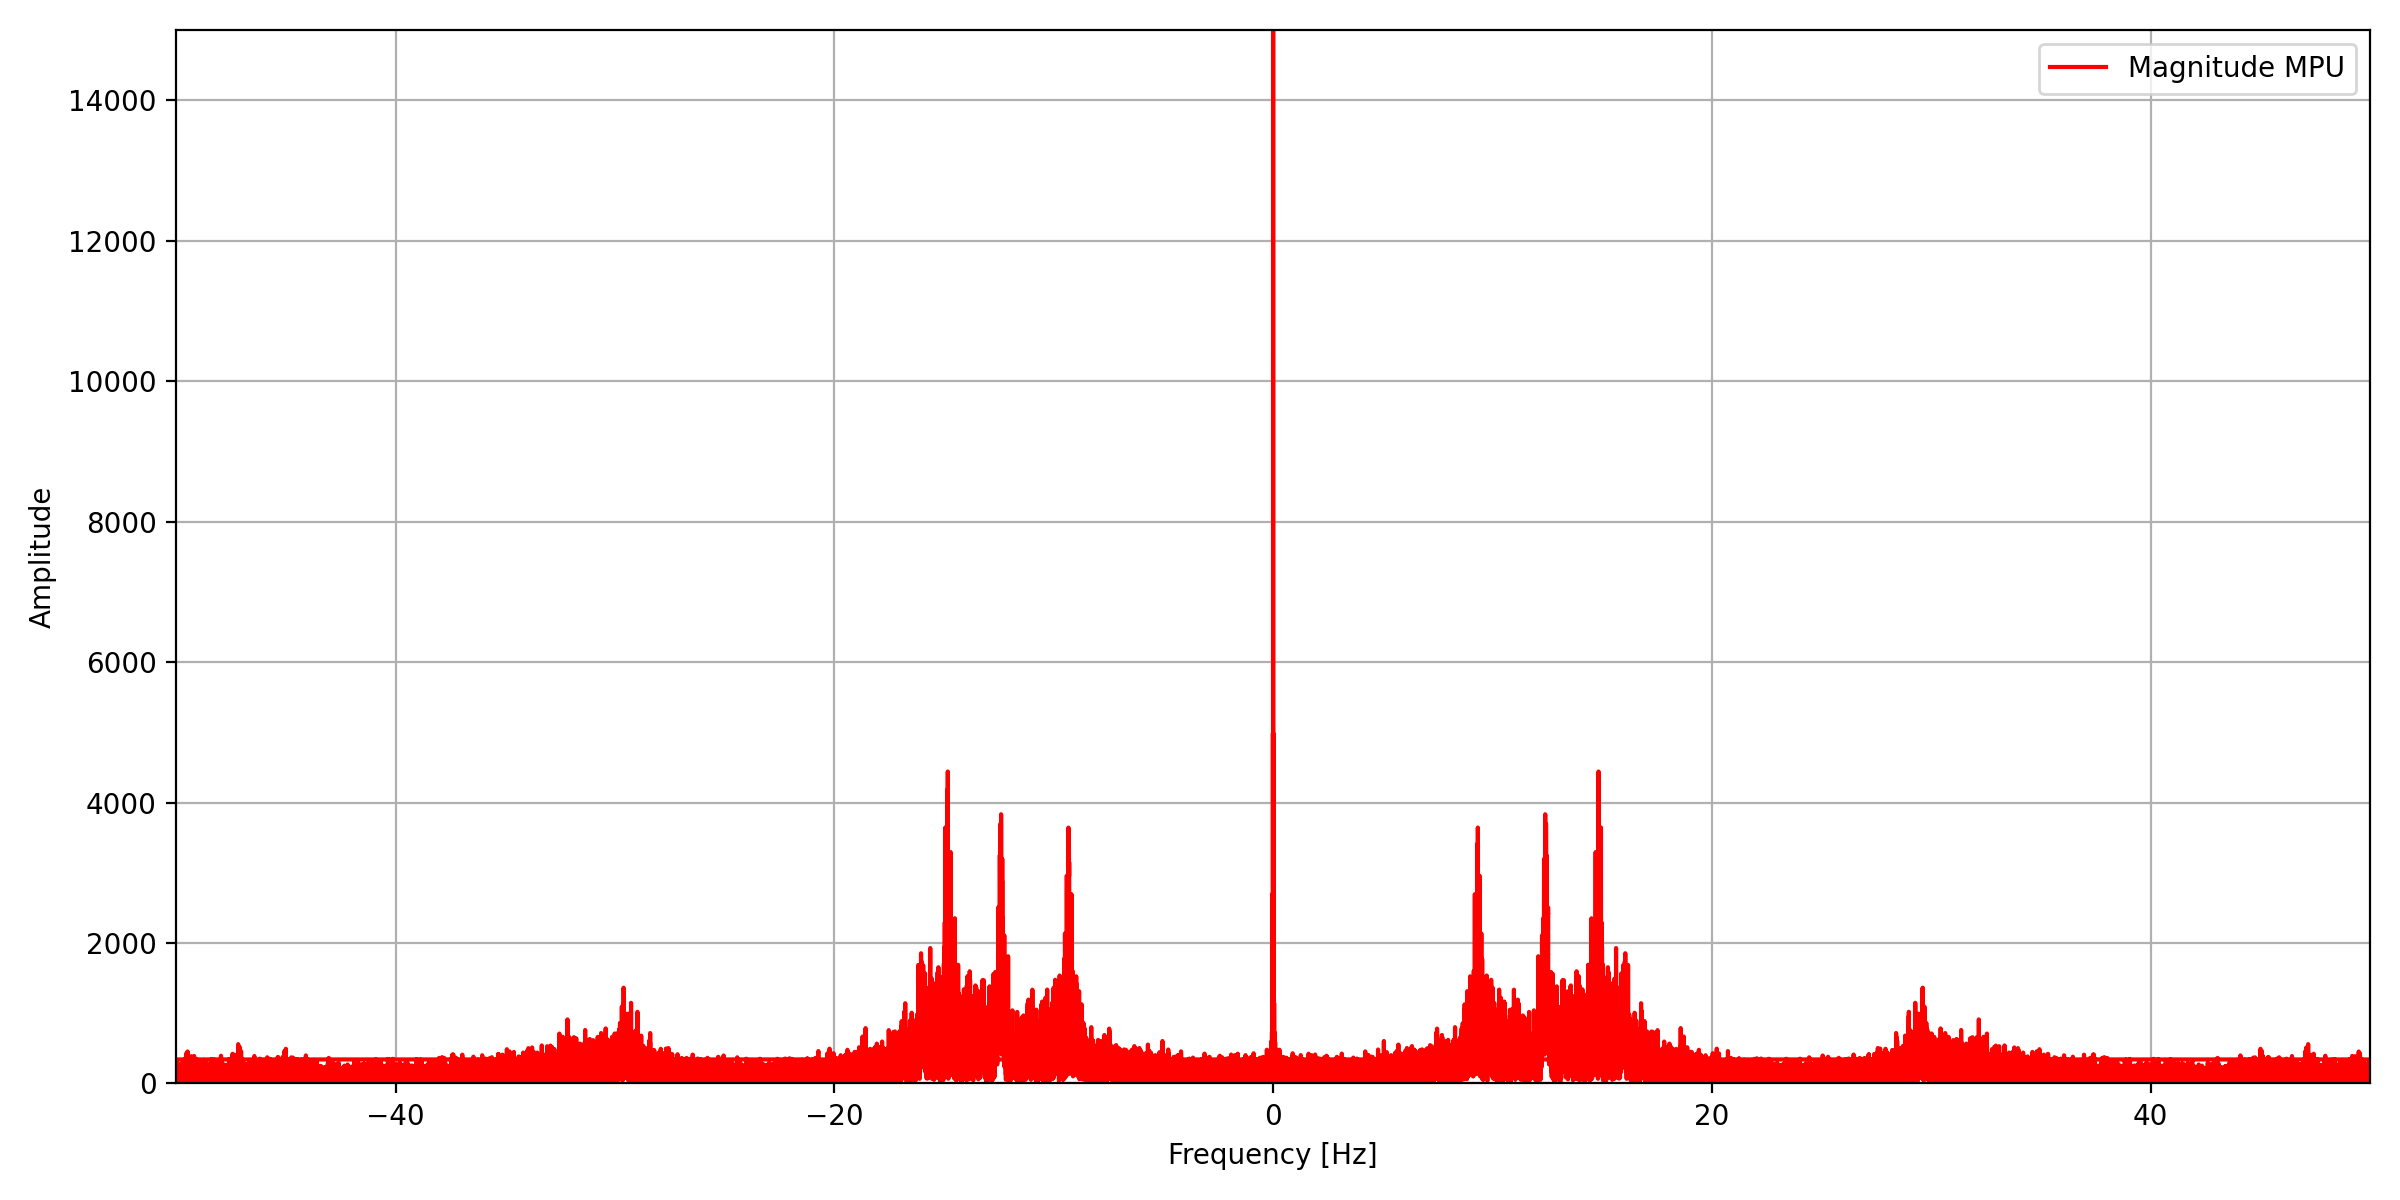

In [13]:
# Frequency Domain Analysis : Total magnitude comparison

plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(fft_values_mag), label='Magnitude ADXL', color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(f_start, f_end)
plt.ylim(ampl_start, ampl_end)
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(frequencies2, np.abs(fft_values2_mag), label='Magnitude MPU', color='red')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(f_start, f_end)
plt.ylim(ampl_start, ampl_end)
plt.tight_layout()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


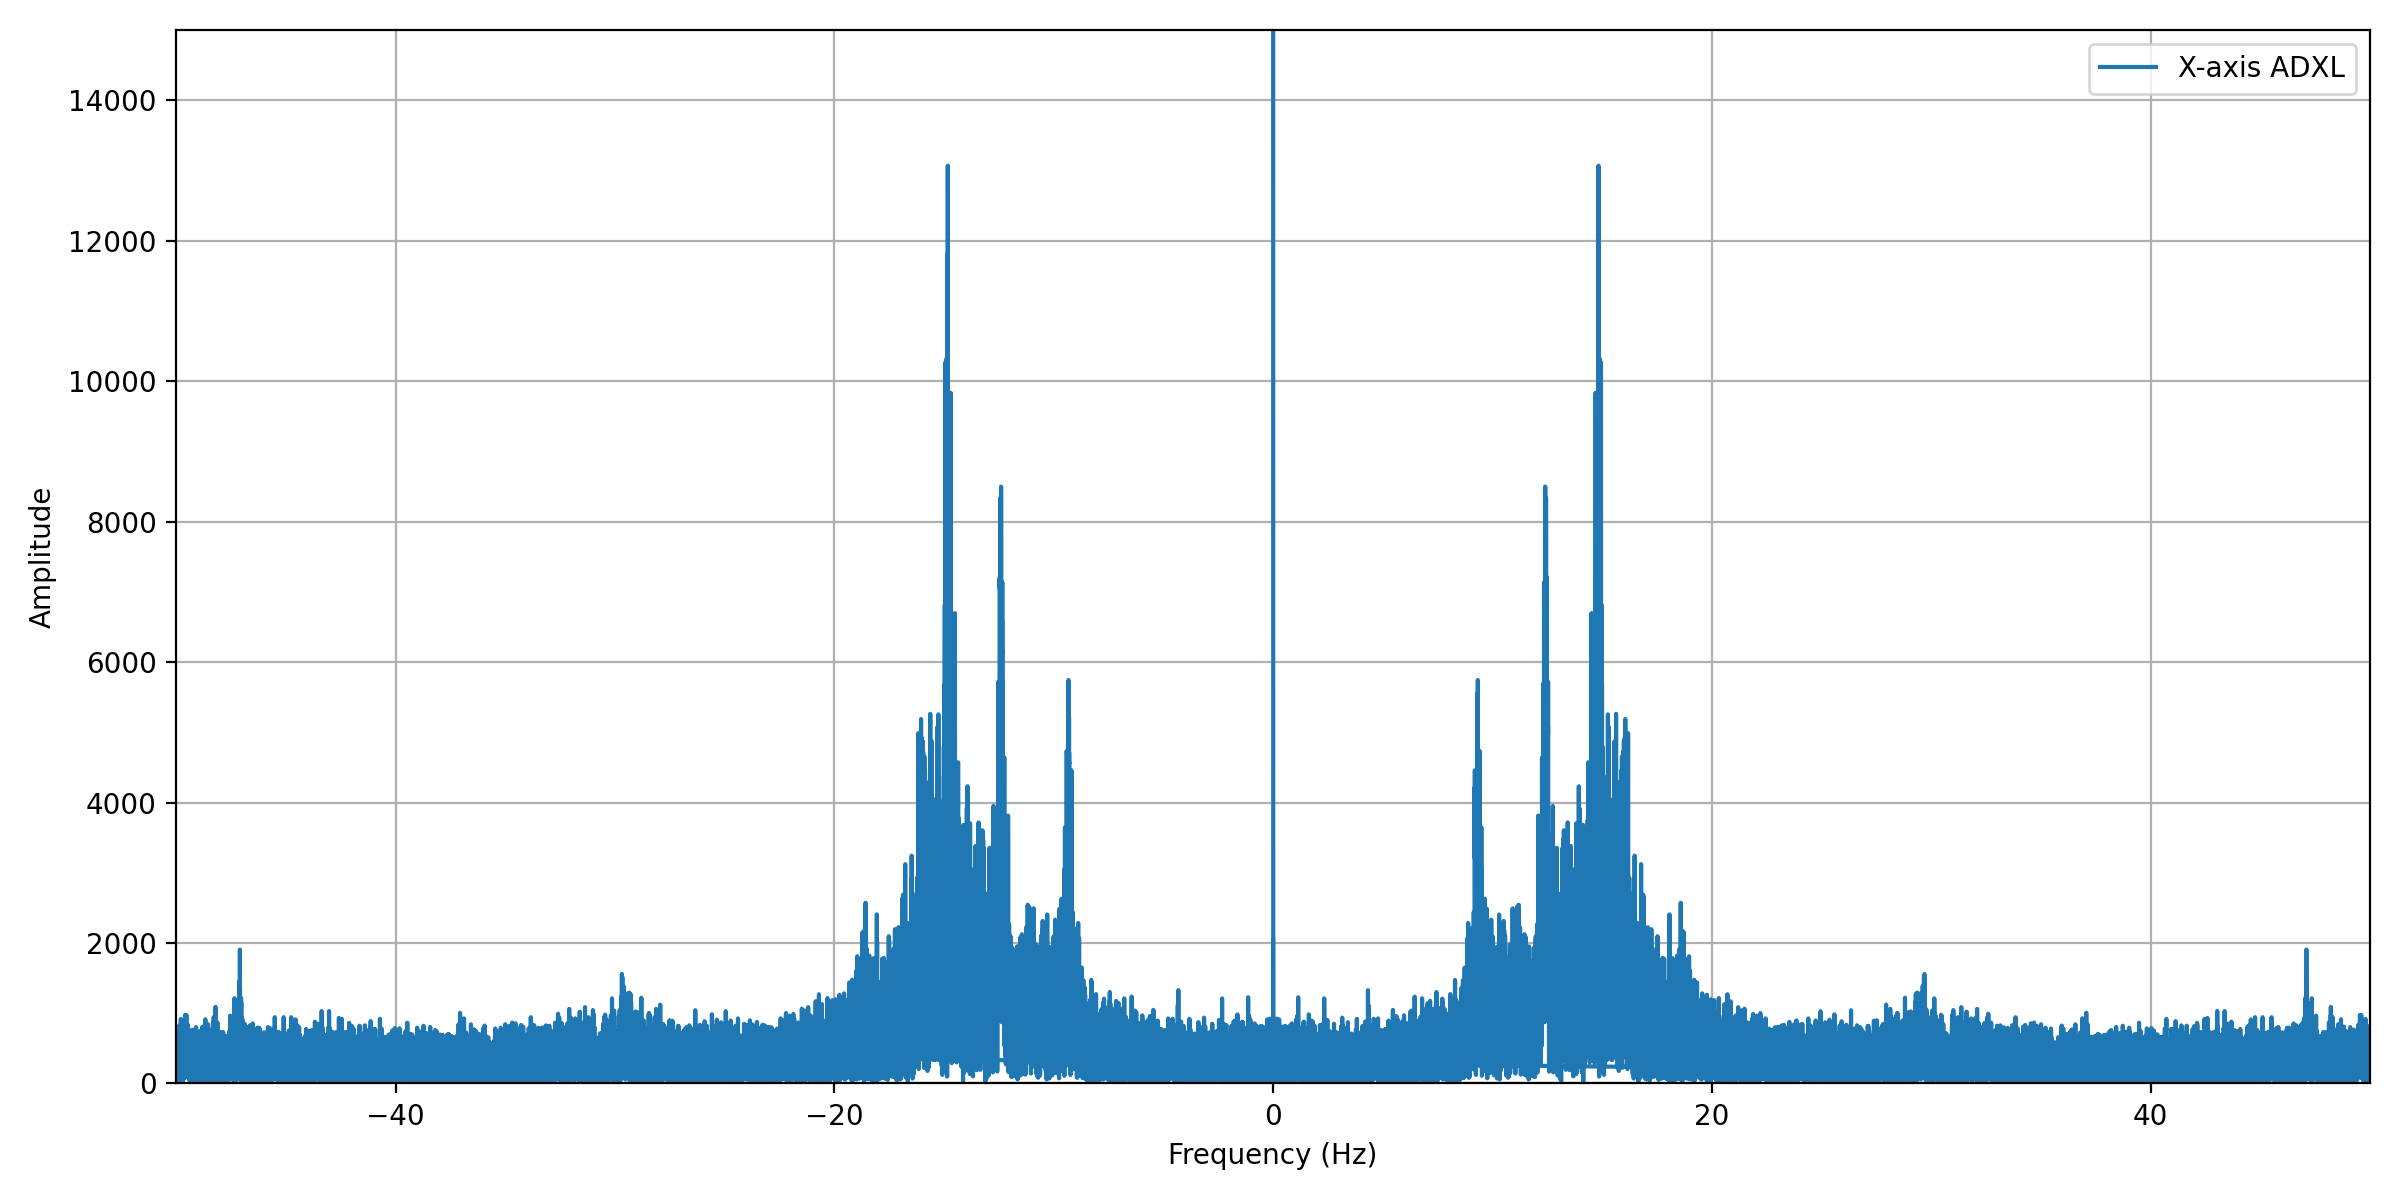

<IPython.core.display.Javascript object>


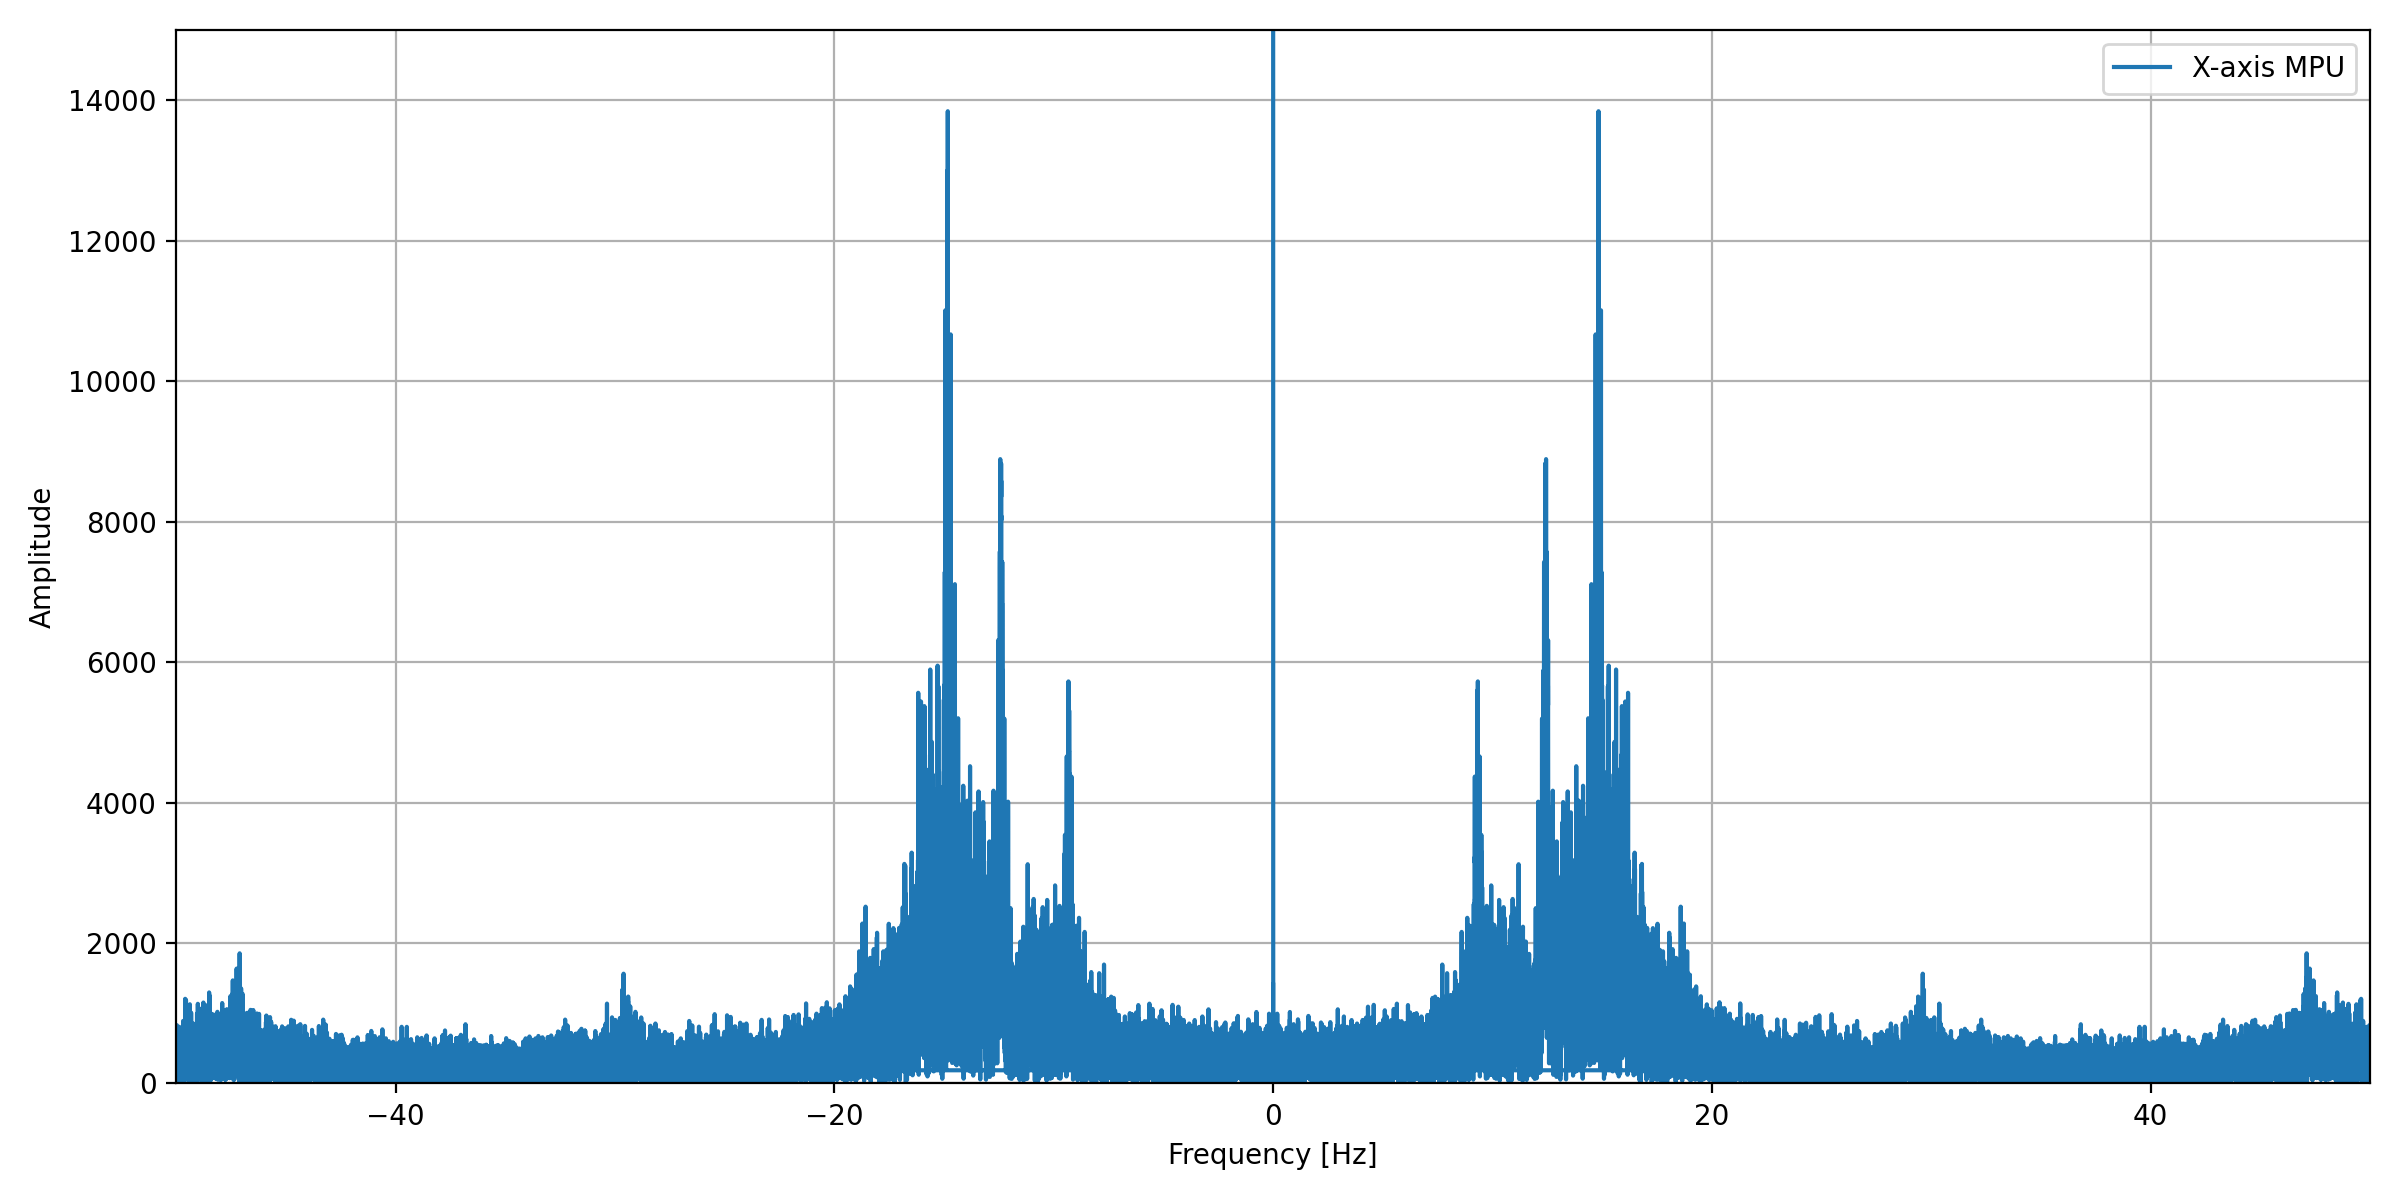

In [14]:
# Frequency Domain Analysis : X-axis comparison

plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(fft_values_x), label='X-axis ADXL')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(f_start, f_end)
plt.ylim(ampl_start, ampl_end)
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(frequencies2, np.abs(fft_values2_x), label='X-axis MPU')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(f_start, f_end)
plt.ylim(ampl_start, ampl_end)
plt.tight_layout()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


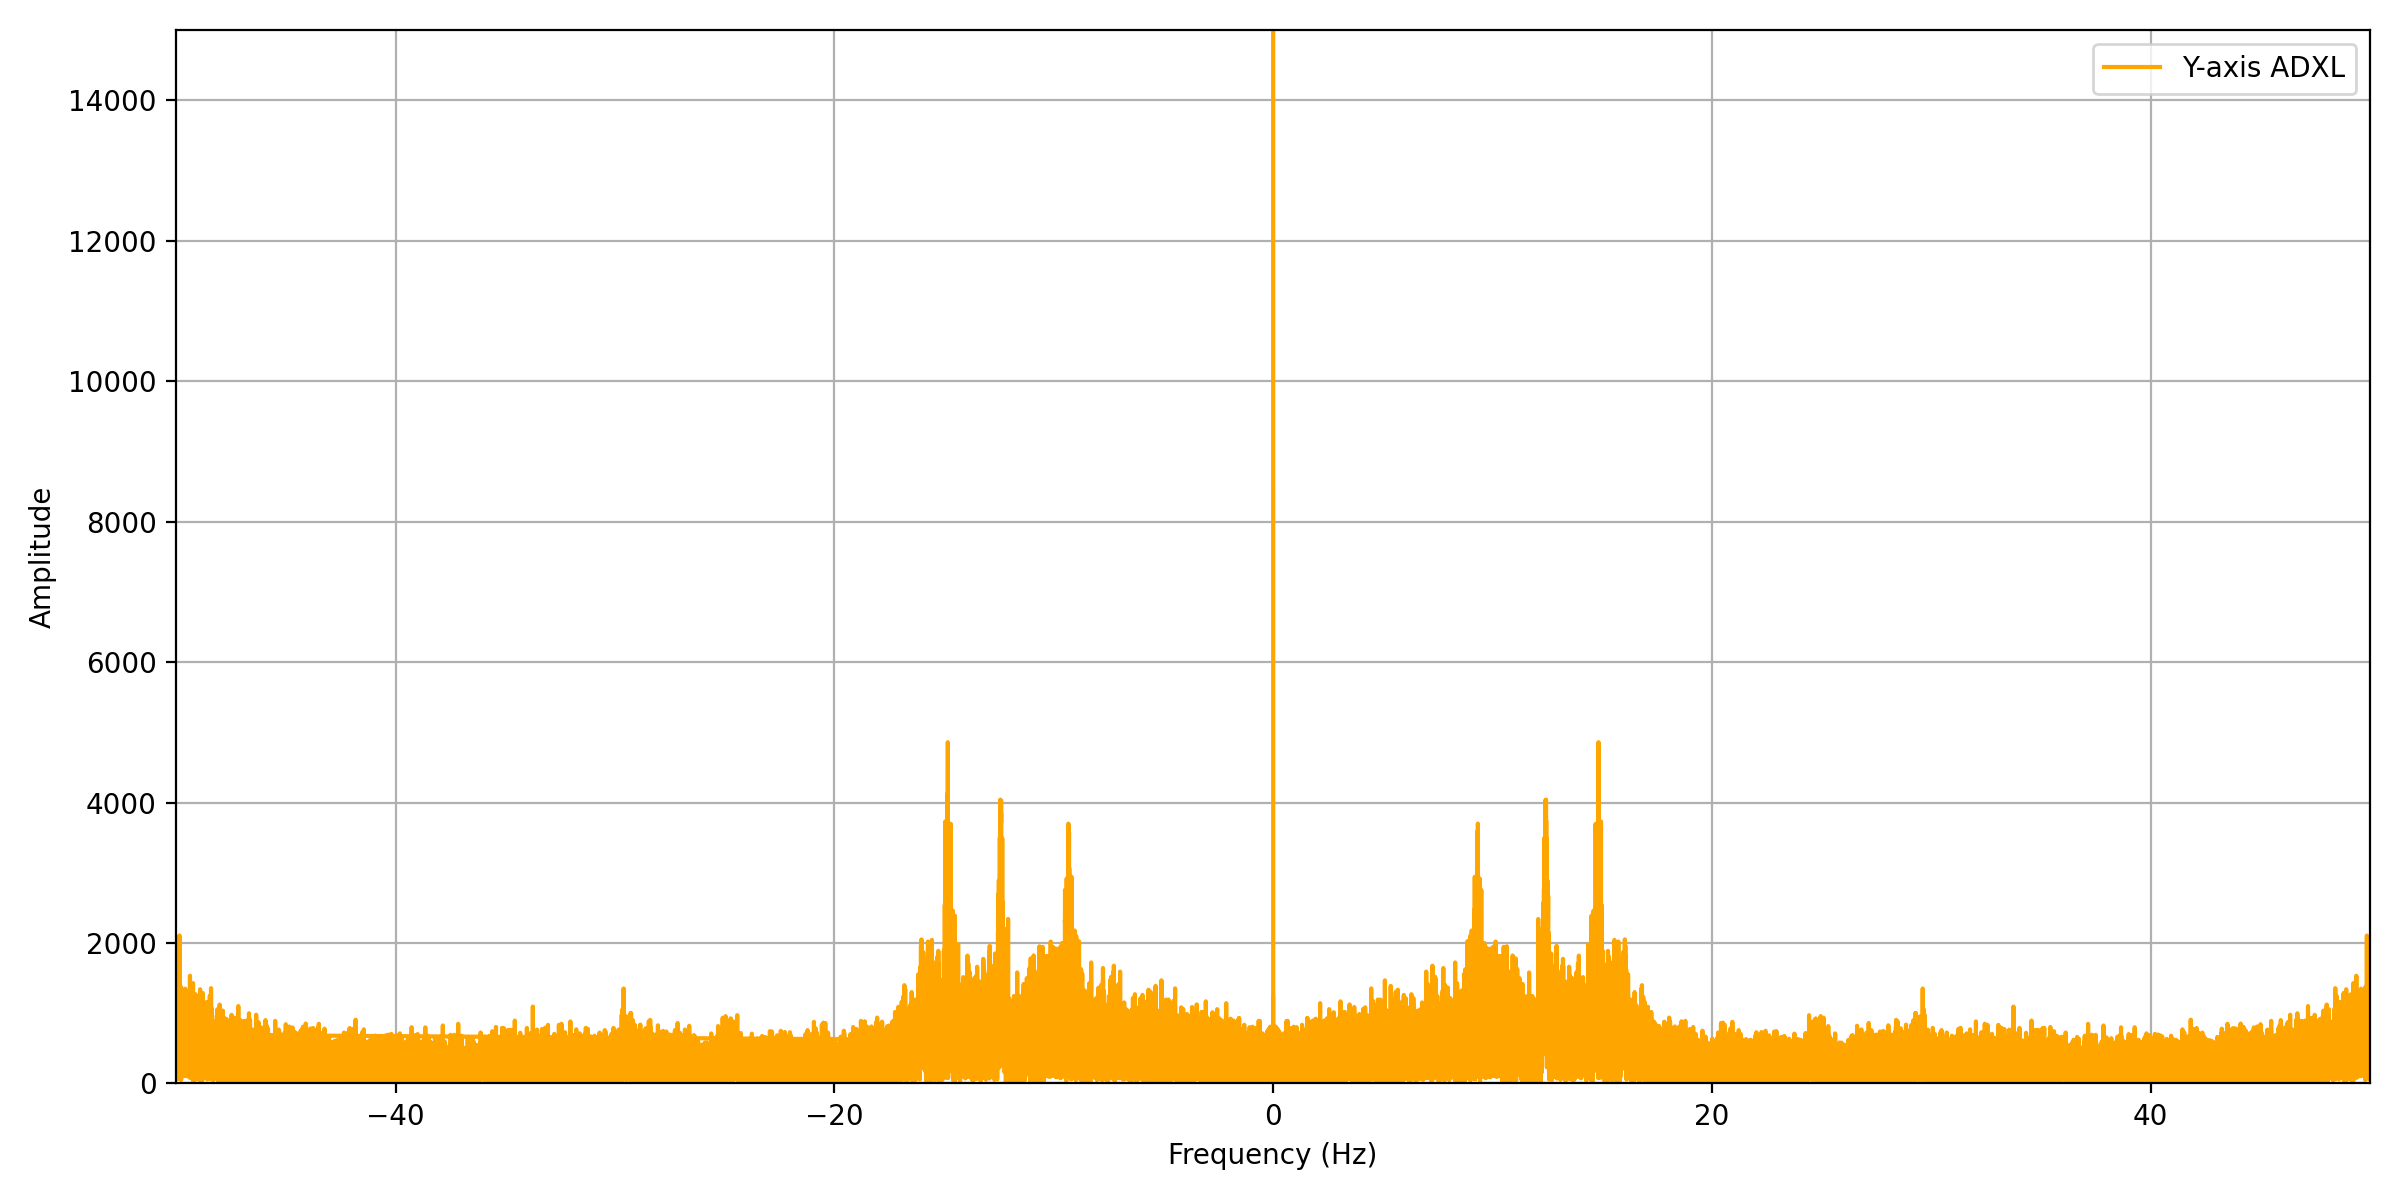

<IPython.core.display.Javascript object>


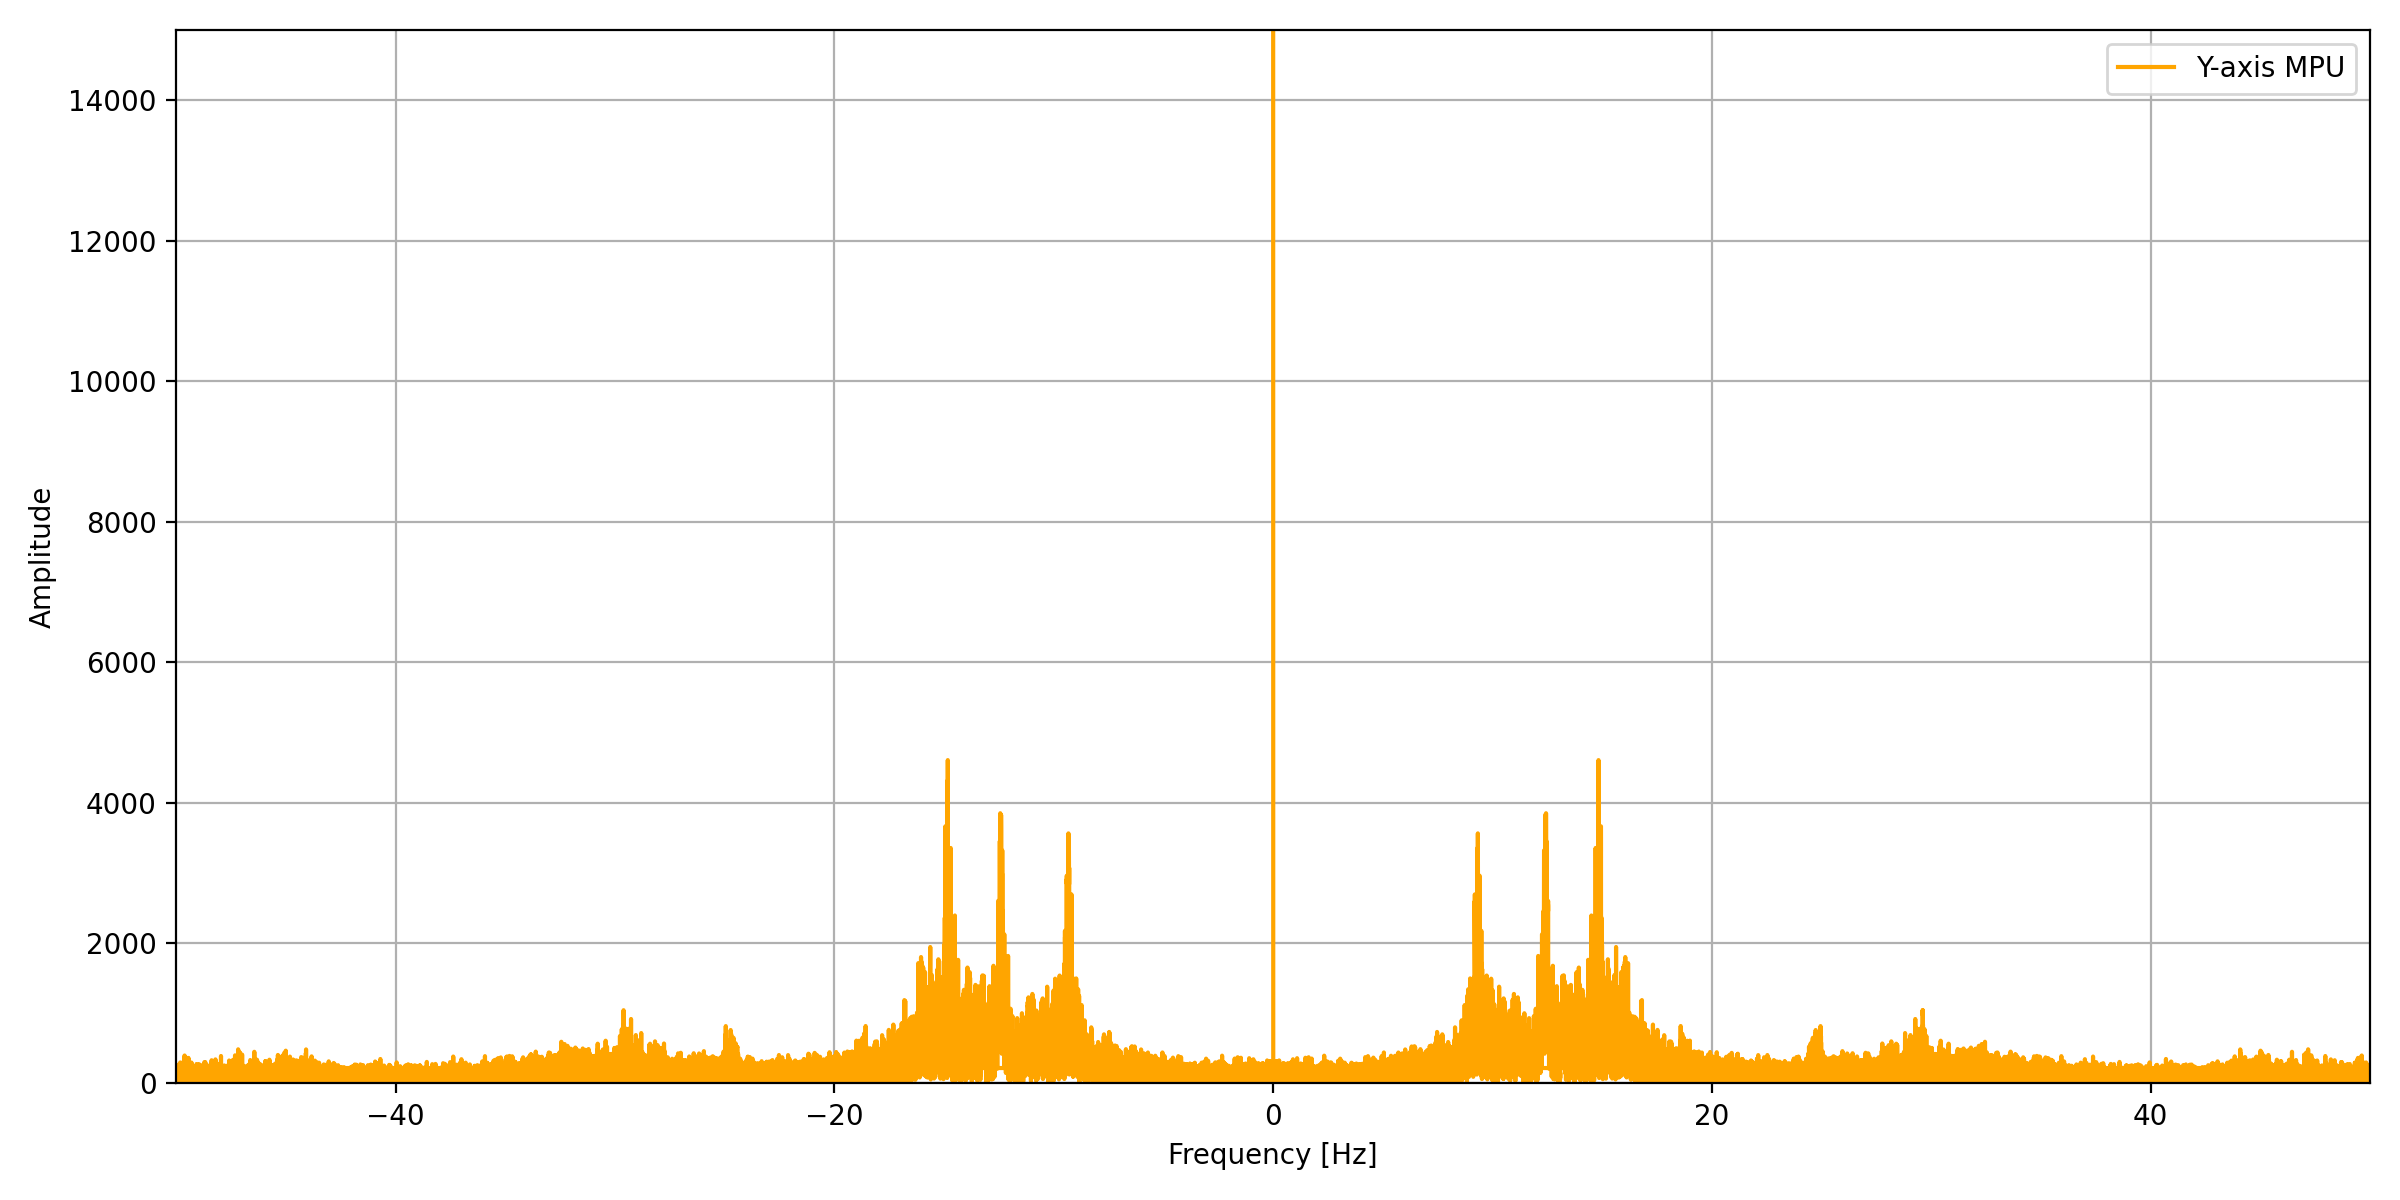

In [15]:
# Frequency Domain Analysis : Y-axis comparison

plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(fft_values_y), label='Y-axis ADXL', color='orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(f_start, f_end)
plt.ylim(ampl_start, ampl_end)
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(frequencies2, np.abs(fft_values2_y), label='Y-axis MPU', color='orange')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(f_start, f_end)
plt.ylim(ampl_start, ampl_end)
plt.tight_layout()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


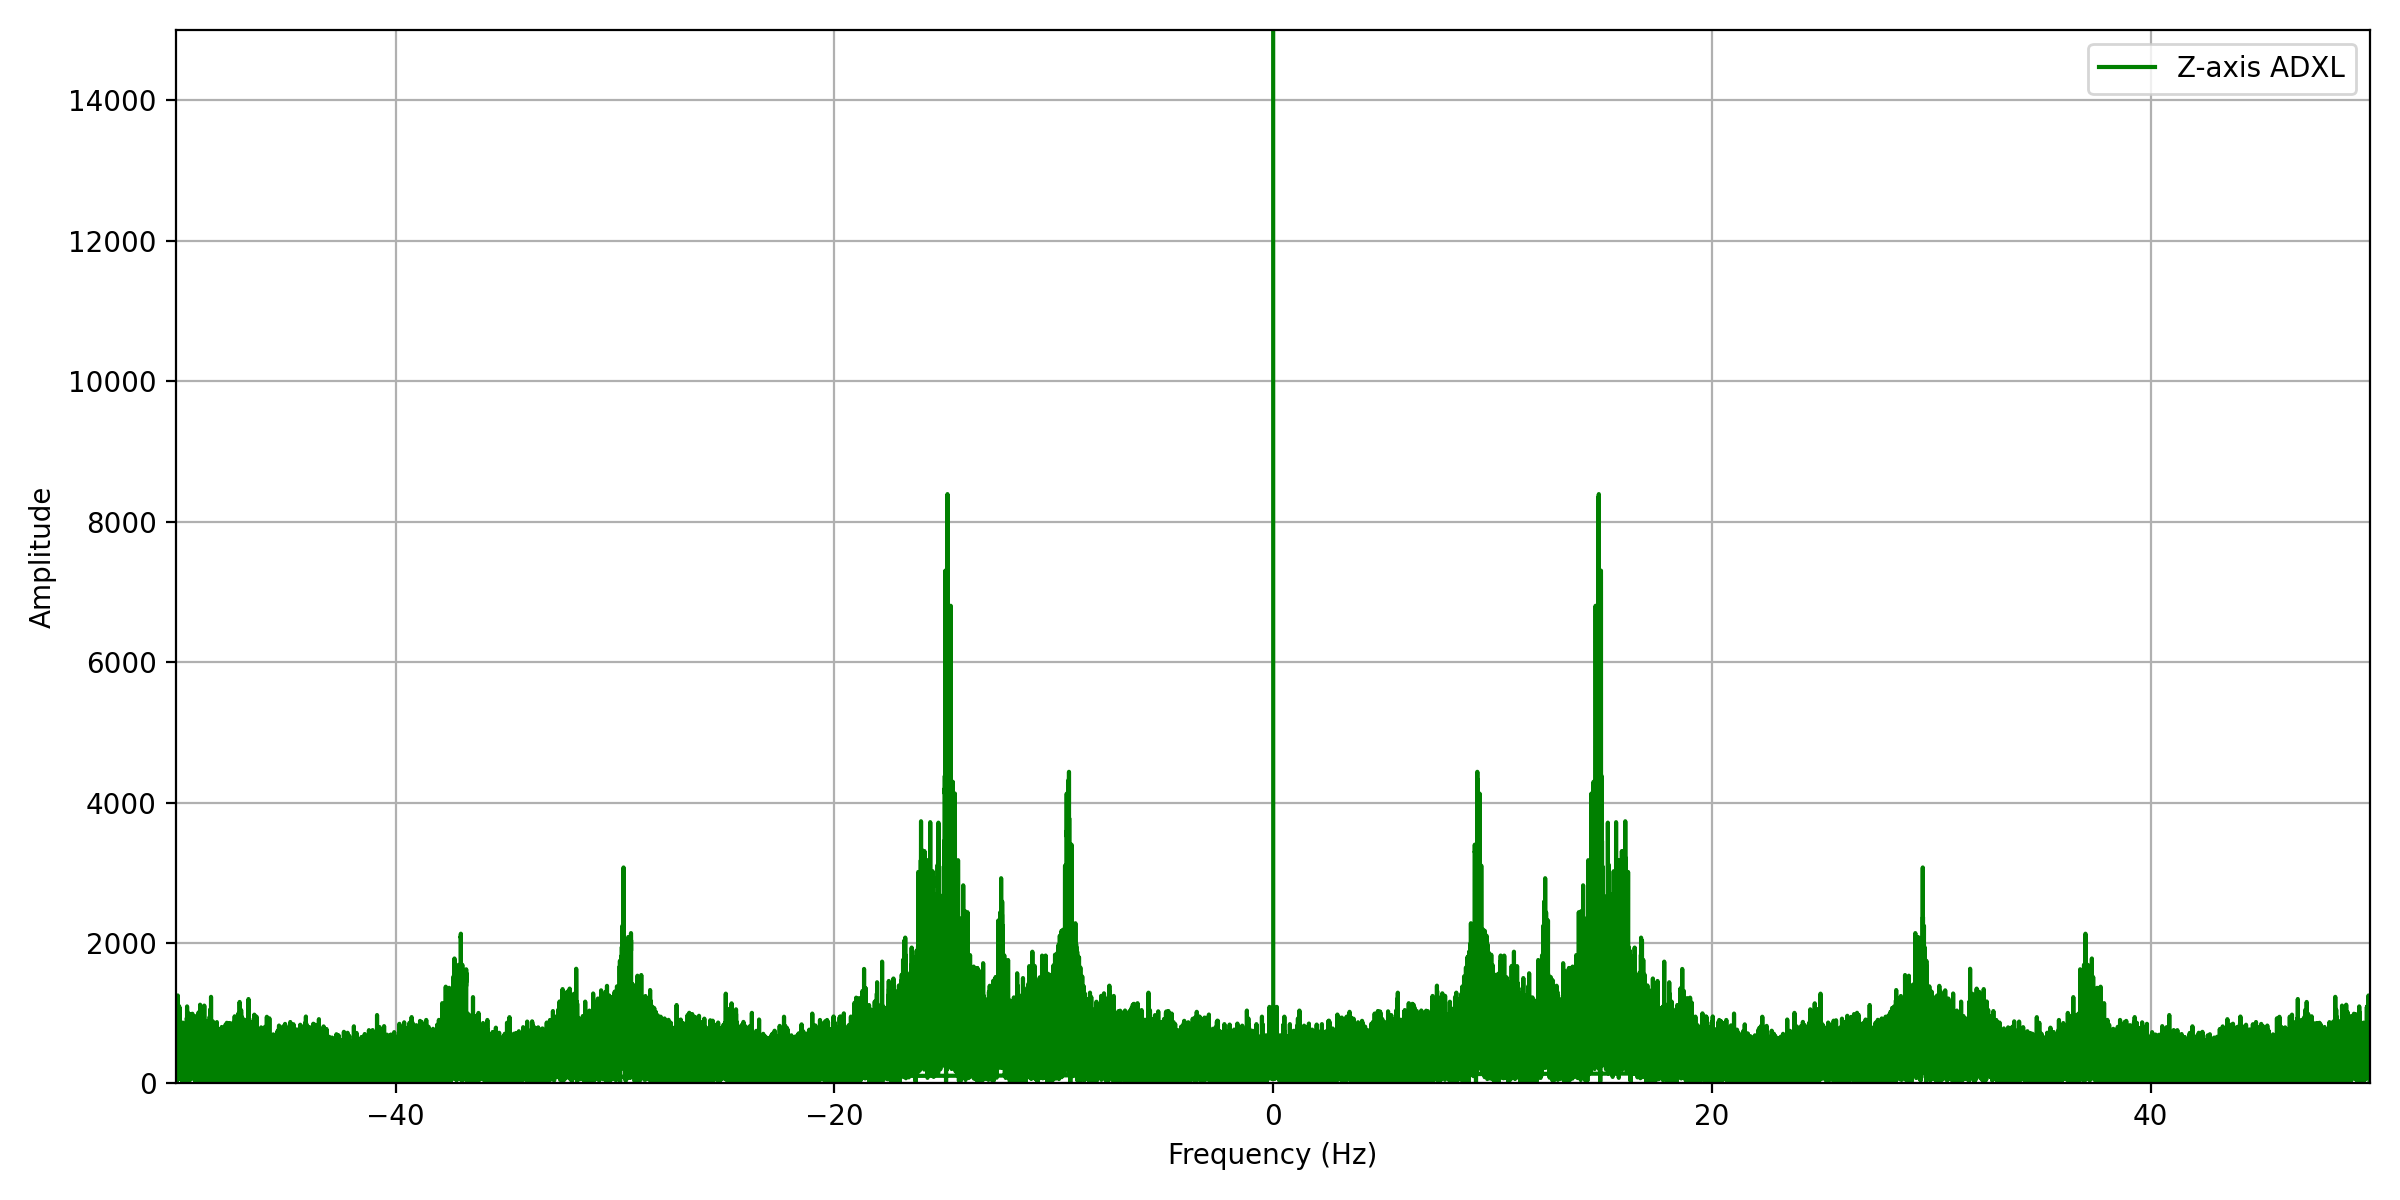

<IPython.core.display.Javascript object>


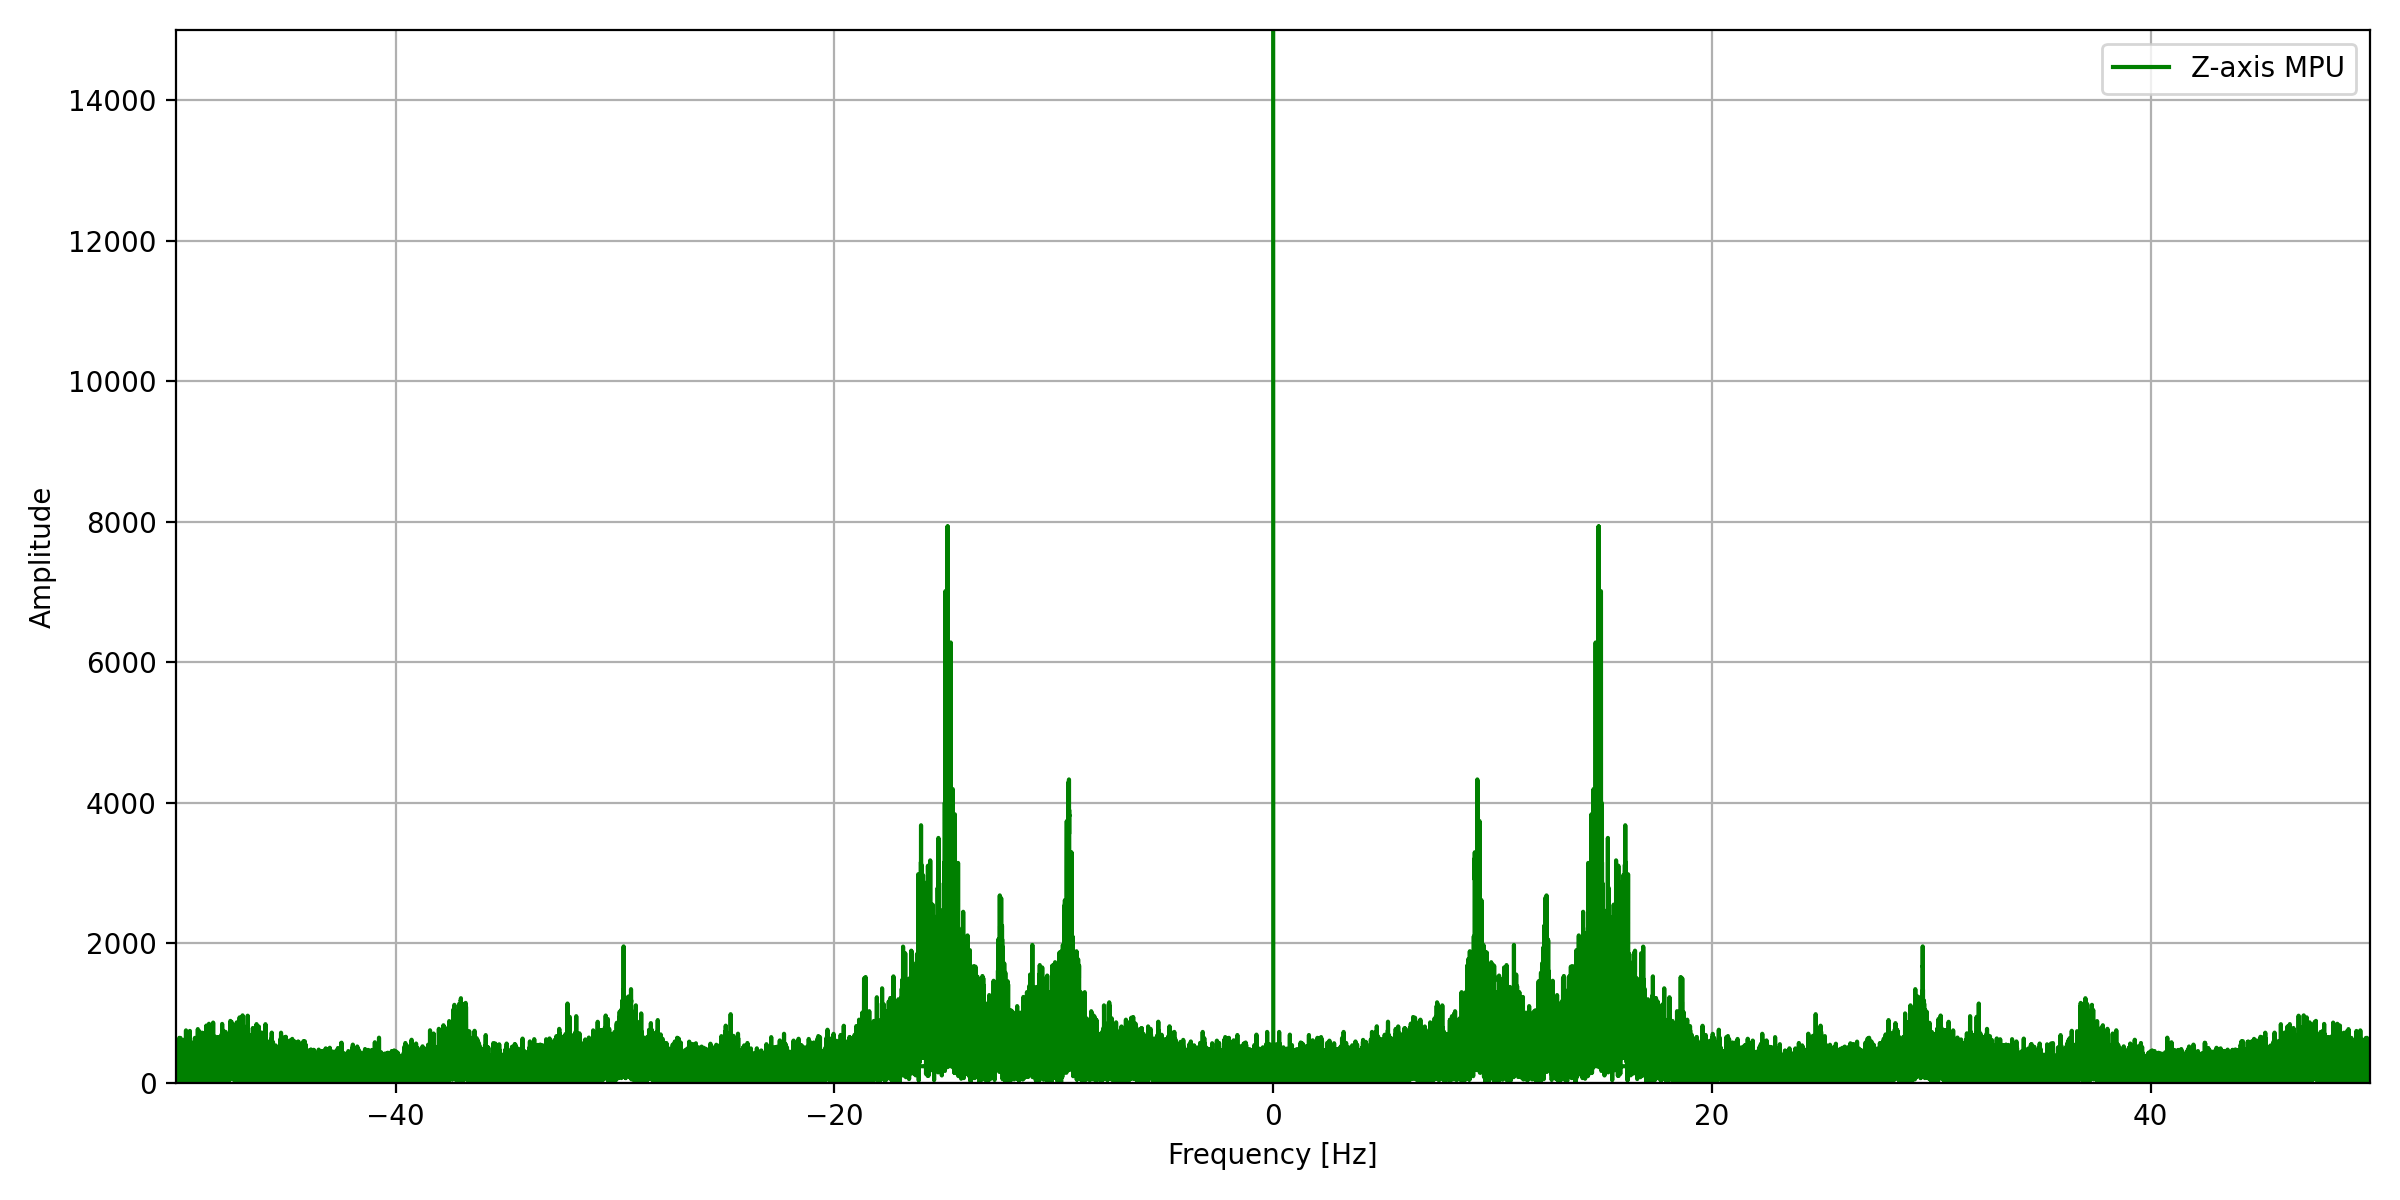

In [16]:
# Frequency Domain Analysis : Z-axis comparison

plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(fft_values_z), label='Z-axis ADXL', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(f_start, f_end)
plt.ylim(ampl_start, ampl_end)
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(frequencies2, np.abs(fft_values2_z), label='Z-axis MPU', color='green')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(f_start, f_end)
plt.ylim(ampl_start, ampl_end)
plt.tight_layout()
plt.grid(True)
plt.show()

Mean values for ADXL345 data:
acceleration_x            -0.762104
acceleration_y             9.901872
acceleration_z            -0.564465
acceleration_magnitude    10.394115
dtype: float64

Standard deviation values for ADXL345 data:
acceleration_x            2.494567
acceleration_y            1.516465
acceleration_z            1.768914
acceleration_magnitude    1.600119
dtype: float64

Mean values for MPU5060 data:
acceleration_x             0.277127
acceleration_y            12.783901
acceleration_z             0.480932
acceleration_magnitude    13.130516
dtype: float64

Standard deviation values for MPU5060 data:
acceleration_x            2.582467
acceleration_y            1.048756
acceleration_z            1.515344
acceleration_magnitude    1.179411
dtype: float64


<IPython.core.display.Javascript object>


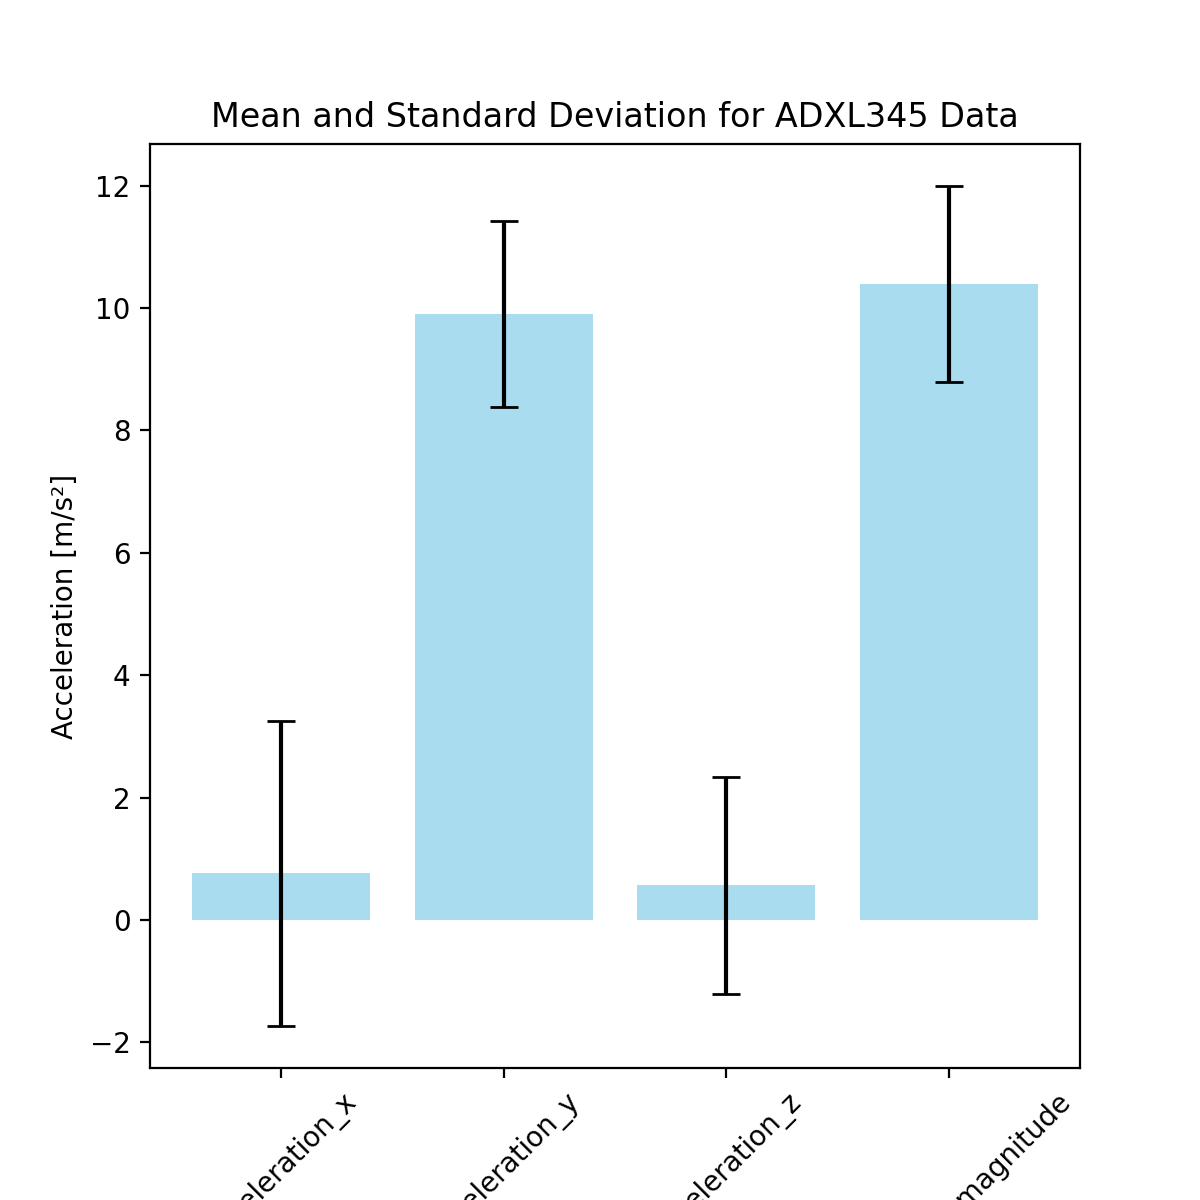

<IPython.core.display.Javascript object>


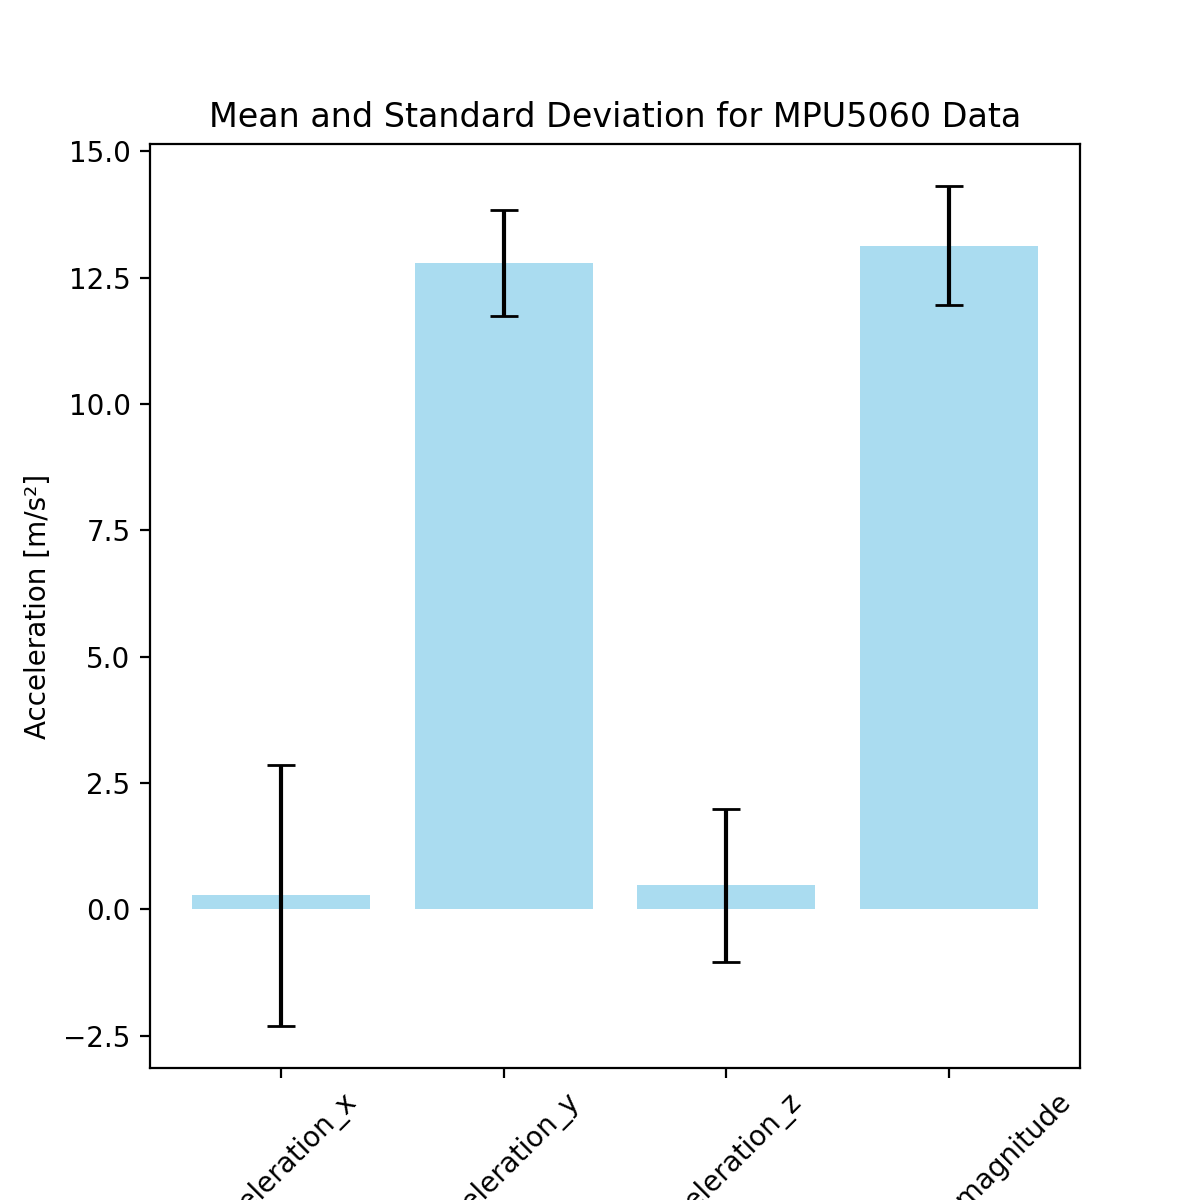

In [17]:
# Statistics

# Compute interesting stats
mean_values = adxl_data[['acceleration_x', 'acceleration_y', 'acceleration_z', 'acceleration_magnitude']].mean()
std_values = adxl_data[['acceleration_x', 'acceleration_y', 'acceleration_z', 'acceleration_magnitude']].std()

print("Mean values for ADXL345 data:")
print(mean_values)

print("\nStandard deviation values for ADXL345 data:")
print(std_values)

mean_values2 = mpu_data[['acceleration_x', 'acceleration_y', 'acceleration_z', 'acceleration_magnitude']].mean()
std_values2 = mpu_data[['acceleration_x', 'acceleration_y', 'acceleration_z', 'acceleration_magnitude']].std()

print("\nMean values for MPU5060 data:")
print(mean_values2)

print("\nStandard deviation values for MPU5060 data:")
print(std_values2)

# Plot mean values with error bars (standard deviations)
plt.figure(figsize=(6, 6))
plt.bar(mean_values.index, np.abs(mean_values), yerr=np.abs(std_values), capsize=5, color='skyblue', alpha=0.7)
plt.title('Mean and Standard Deviation for ADXL345 Data')
plt.xlabel('Axes')
plt.ylabel('Acceleration [m/s²]')
plt.xticks(rotation=45)

plt.figure(figsize=(6, 6))
plt.bar(mean_values2.index, np.abs(mean_values2), yerr=np.abs(std_values2), capsize=5, color='skyblue', alpha=0.7)
plt.title('Mean and Standard Deviation for MPU5060 Data')
plt.xlabel('Axes')
plt.ylabel('Acceleration [m/s²]')
plt.xticks(rotation=45)
plt.show()